Import libraries

In [1]:
import pandas as pd
import os
import re
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()
%matplotlib inline

Parse in the banzuke (rankings) by decade. 

In [59]:
#create the ranking dataframes by decade
ranking_1950 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 
ranking_1960 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 
ranking_1970 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 
ranking_1980 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 
ranking_1990 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 
ranking_2000 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 
ranking_2010 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 
ranking_2020 = pd.DataFrame([],columns=("rank_code", "name", "birthplace", "stable", "dob", "height", "weight", "rank_no", "rank_date", "division", "age")) 

def parse_ranking_data(path, df):

    #set the path to the ranking files
    ranking_file_path = os.chdir(path)

    #loop through each file in the decade folder
    for files in os.listdir(ranking_file_path):           
                    
        file_name = files
        files = open(file_name, "r")
        lines = files.readlines()
        files.close()

        #reset rank after each file is read
        rank_no = 0

        #get the date of the sumo ranking
        rank_date_string = file_name[0:4] + "-" + file_name[5:7]
        rank_date = datetime.datetime.strptime(rank_date_string, "%Y-%m")

        #parse in the data by looping through each line in the file
        for line in lines:

            #use the number of spaces in the line and the beginning of the rank codes to filter out the irrelevant lines                    
            if "    " in line and "changed from" not in line and line.startswith("Bg") == False and line.startswith("Sj") == False and line.startswith("Mz") == False:
                line = line + " "

                #remove extra spaces
                processed_line = re.sub(' +', ' ', line)

                #separates the columns 
                split = processed_line.split(" ")
                
                #splits the rank from the name if the longer names merged
                if len(split[0]) >= 7:
                    split[6] = split[5]
                    split[5] = split[4]
                    split[4] = split[3]
                    split[3] = split[2]
                    split[2] = split[1]
                    split[1] = split[0][7:]
                    split[0] = split[0][:7]
                    
                #splits the name from the birthplace if the strings merged
                if len(split[1]) >= 15:
                    charCount = 0
                    upperCount = 0

                    for char in split[1]:
                        charCount +=1

                        if char == char.upper():
                            upperCount += 1

                            if upperCount == 2:
                                split[6] = split[5]
                                split[5] = split[4]
                                split[4] = split[3]
                                split[3] = split[2]
                                split[2] = split[1][charCount:]
                                split[1] = split[1][:charCount] 

                #splits the birthplace and the stable if they have merged
                if len(split[2]) >= 12:
                    charCount = 0
                    upperCount = 0

                    for char in split[2]:
                        charCount +=1

                        if char == char.upper():
                            upperCount += 1

                            if upperCount == 2:
                                split[6] = split[5]
                                split[5] = split[4]
                                split[4] = split[3]
                                split[3] = split[2][charCount-1:]
                                split[2] = split[2][:charCount-1]

                #corrects the split if birthplace is Hong Kong or Sri Lanka
                if split[2] == "Hong" and split[3][:4] == "Kong":
                    split[3] = split[4]
                    split[4] = split[5]
                    split[5] = split[6]
                    split[6] = split[7]                      
                    split[2] = "Hong Kong" 

                elif split[2] == "Sri" and split[3][:4] == "Lank":
                    split[3] = split[4]
                    split[4] = split[5]
                    split[5] = split[6]
                    split[6] = split[7]                      
                    split[2] = "Sri Lanka" 

                #splits the birthplace from the stable if the birthplace has a space
                if len(split[3]) >= 6:
                    charCount = 0
                    upperCount = 0

                    for char in split[3]:
                        charCount +=1

                        if char == char.upper():
                            upperCount += 1

                            if upperCount == 2: 
                                split[2] = split[2] + " " + split[3][:charCount-1].title()
                                split[3] = split[3][charCount-1:]

                #default column layout
                rank_code = split[0]
                name = split[1]
                birthplace = split[2]
                stable = split[3]
                dob = split[4]
                height = split[5]
                weight = split[6]
                rank_no = rank_no + 1

                #convert height to int
                if height[0] == "-":
                    height = "-"
                else: 
                    height = float(height)

                #convert height to int
                if weight[0] == "-":
                    weight = "-"
                else: 
                    weight = float(weight)

                #convert dob to date
                if dob[0] == "-":
                    dob = "-"
                else:
                    dob = dob[6:11] + "-" + dob[3:5] + "-" +  dob[0:2]
                    dob = datetime.datetime.strptime(dob, "%Y-%m-%d")

                #calculate age if dob is given
                if dob == "-":
                    age = "-"
                else:
                    age = rank_date - dob
                
                #set division
                if rank_code[0].upper() == "Y" or rank_code[0].upper() == "O" or rank_code[0].upper() == "K":
                    division = "Makuuchi"
                elif rank_code[0].upper() == "S":
                    if rank_code[1].upper() == "D":
                        division = "Sandanme"
                    else:
                        division = "Makuuchi"
                elif rank_code[0].upper() == "M":
                    if rank_code[1].upper() == "S":
                        division = "Makushita"
                    else:
                        division = "Makuuchi"
                elif rank_code[0].upper() == "J":
                    if rank_code[1].upper() == "D":
                        division = "Jonidan"
                    elif rank_code[1].upper() == "K":
                        division = "Jonokuchi"
                    else:
                        division = "Juryo"

                #apply the data to the dataframe
                df.loc[len(df.index)] = [rank_code, name, birthplace, stable, dob, height, weight, rank_no, rank_date, division, age]
                
#parse the data for each decade
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1950/", ranking_1950)
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1960/", ranking_1960)
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1970/", ranking_1970)
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1980/", ranking_1980)
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1990/", ranking_1990)
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/2000/", ranking_2000)
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/2010/", ranking_2010)
parse_ranking_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/2020/", ranking_2020)

Delete the "day 16" files from the tournament folder as they do not provide bout insights. Then, parse in each tournament file by decade.

In [60]:
#create the tournament dataframes by decade
tournament_1950 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))
tournament_1960 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))
tournament_1970 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))
tournament_1980 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))
tournament_1990 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))
tournament_2000 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))
tournament_2010 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))
tournament_2020 = pd.DataFrame(columns=("date", "day_no", "division", "win_technique","rank_1", "name_1", "record_1", "rank_2", "name_2", "record_2"))

def parse_tournament_data(path, df):    
    #set the path to the tournament file
    tournament_file_path = os.chdir(path)

    #loop through each file in the decade folder
    for files in os.listdir(tournament_file_path):    

        file_name = files
        files = open(file_name, "r")
        lines = files.readlines()
        files.close()

        #get date of the tournament
        tournament_date_string = file_name[0:4] + "-" + file_name[5:7]
        tournament_date = datetime.datetime.strptime(tournament_date_string, "%Y-%m")

        #get the day of the tournament
        tournament_day_no = int(file_name[-6:-4])

        #parse in the data by looping through each line in the file
        for line in lines:

            #get the division of the bout
            if "Makuuchi" in line:
                division = "Makuuchi"
            elif "Juryo" in line:
                division = "Juryo"
            elif "Makushita" in line:
                division = "Makushita"
            elif "Sandanme" in line:
                division = "Sandanme"
            elif "Jonidan" in line:
                division = "Jonidan"
            elif "Jonokuchi" in line:
                division = "Jonokuchi"

            #use the number of spaces in the line and the beginning of the rank codes to filter out the irrelevant lines                     
            if "    " in line and "changed from" not in line and line.startswith("Bg") == False and line.startswith("Sj") == False and line.startswith("Mz") == False:
                line = line + " "

                #remove extra spaces
                processed_line = re.sub(' +', ' ', line)

                #separates the columns 
                split = processed_line.split(" ")

                #adjust the splits if winning_technique merges with wrestler_2_rank
                if len(split[3]) >= 16:
                    split[6] = split[5]
                    split[5] = split[4]
                    split[4] = split[3][16:]
                    split[3] = split[3][:16]
                    split[2] = split[2]
                    split[1] = split[1]
                    split[0] = split[0]

                #default column layout
                wrestler_1_rank = split[0]
                wrestler_1_name = split[1]
                wrestler_1_record = split[2]
                winning_technique = split[3]
                wrestler_2_rank = split[4]
                wrestler_2_name = split[5]
                wrestler_2_record = split[6]

                #apply the parsed data to the dataframe
                df.loc[len(df.index)] = [tournament_date, tournament_day_no, division, winning_technique, wrestler_1_rank, 
                                        wrestler_1_name, wrestler_1_record, wrestler_2_rank, wrestler_2_name, wrestler_2_record]

#parse the data for each decade
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/1950/", tournament_1950)
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/1960/", tournament_1960)
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/1970/", tournament_1970)
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/1980/", tournament_1980)
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/1990/", tournament_1990)
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/2000/", tournament_2000)
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/2010/", tournament_2010)
parse_tournament_data("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/torikumi/2020/", tournament_2020)

Parse in the name changes from the banzuke files.

In [61]:
changed_names_1950 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 
changed_names_1960 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 
changed_names_1970 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 
changed_names_1980 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 
changed_names_1990 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 
changed_names_2000 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 
changed_names_2010 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 
changed_names_2020 = pd.DataFrame(columns=("rank", "old_name", "new_name", "date_changed")) 

def parse_name_changes(path, df):

    #set directory
    name_changes_path = os.chdir(path)
    #run through all files in directory
    for files in os.listdir(name_changes_path):           
            
        file_name = files
        files = open(file_name, "r")
        lines = files.readlines()
        files.close()

        #get date of the name change
        rank_date_string = file_name[0:4] + "-" + file_name[5:7]
        rank_date = datetime.datetime.strptime(rank_date_string, "%Y-%m")

        #get the sumo data
        for line in lines:
                                
            if "changed from" in line:
                
                line = line + " "

                #remove extra spaces
                processed_line = re.sub(' +', ' ', line)

                #separates the columns 
                split = processed_line.split(" ")
                
                rank = split[0]
                new_name = split[1]
                old_name = split[4]

                df.loc[len(df.index)] = [rank, old_name, new_name, rank_date]

#parse the data for each decade
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1950/",changed_names_1950)
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1960/",changed_names_1960)
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1970/",changed_names_1970)
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1980/",changed_names_1980)
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/1990/",changed_names_1990)
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/2000/",changed_names_2000)
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/2010/",changed_names_2010)
parse_name_changes("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/banzuke/2020/",changed_names_2020)

#concat the name changes by decade into one dataframe
changed_names = pd.concat([changed_names_1950, changed_names_1960, changed_names_1970, changed_names_1980, 
                    changed_names_1990, changed_names_2000, changed_names_2010, changed_names_2020], 
                    ignore_index = True, sort = False)

Save the parsed datasets to Excel

In [62]:
#set the paths for the cleaned dataframes to be saved
parsed_data_path = os.chdir('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/')

#save the cleaned dataframes as excel documents
ranking_1950.to_excel('parsed_ranking_1950.xlsx', sheet_name='sheet1', index=False)
ranking_1960.to_excel('parsed_ranking_1960.xlsx', sheet_name='sheet1', index=False)
ranking_1970.to_excel('parsed_ranking_1970.xlsx', sheet_name='sheet1', index=False)
ranking_1980.to_excel('parsed_ranking_1980.xlsx', sheet_name='sheet1', index=False)
ranking_1990.to_excel('parsed_ranking_1990.xlsx', sheet_name='sheet1', index=False)
ranking_2000.to_excel('parsed_ranking_2000.xlsx', sheet_name='sheet1', index=False)
ranking_2010.to_excel('parsed_ranking_2010.xlsx', sheet_name='sheet1', index=False)
ranking_2020.to_excel('parsed_ranking_2020.xlsx', sheet_name='sheet1', index=False)

tournament_1950.to_excel('parsed_tournament_1950.xlsx', sheet_name='sheet1', index=False)
tournament_1960.to_excel('parsed_tournament_1960.xlsx', sheet_name='sheet1', index=False)
tournament_1970.to_excel('parsed_tournament_1970.xlsx', sheet_name='sheet1', index=False)
tournament_1980.to_excel('parsed_tournament_1980.xlsx', sheet_name='sheet1', index=False)
tournament_1990.to_excel('parsed_tournament_1990.xlsx', sheet_name='sheet1', index=False)
tournament_2000.to_excel('parsed_tournament_2000.xlsx', sheet_name='sheet1', index=False)
tournament_2010.to_excel('parsed_tournament_2010.xlsx', sheet_name='sheet1', index=False)
tournament_2020.to_excel('parsed_tournament_2020.xlsx', sheet_name='sheet1', index=False)

changed_names.to_excel('parsed_changed_names.xlsx', sheet_name='sheet1', index=False)

Cleaning Stage:
Remove ranking data outside of the top three divisions prior to 1990 as there is only tournament data for the top two division data prior to 1988 - the third division is needed as some highly ranked 3rd division wrestlers occasionally compete in division 2 (Juryo). Then, the 1988-1989 the lower divisions have many missing values. After 1990 all data is available.

In [123]:
#keeps only the rows for wrestlers in the top three divisions between 1950 and 1979
ranking_1950 = ranking_1950[ranking_1950["division"].isin(["Makuuchi", "Juryo", "Makushita"]) == True]
ranking_1960 = ranking_1960[ranking_1960["division"].isin(["Makuuchi", "Juryo", "Makushita"]) == True]
ranking_1970 = ranking_1970[ranking_1970["division"].isin(["Makuuchi", "Juryo", "Makushita"]) == True]
ranking_1980 = ranking_1980[ranking_1980["division"].isin(["Makuuchi", "Juryo", "Makushita"]) == True]

#reset the index after removing the rows
ranking_1950.reset_index(drop=True, inplace=True)
ranking_1960.reset_index(drop=True, inplace=True)
ranking_1970.reset_index(drop=True, inplace=True)
ranking_1980.reset_index(drop=True, inplace=True)

#remove the tournament data from non-top two divisions
tournament_1980 = tournament_1980[tournament_1980["division"].isin(["Makuuchi", "Juryo"]) == True]

#reset the index after removing the rows
tournament_1980.reset_index(drop=True, inplace=True)

Set NaNs for all cells without values

In [124]:
def set_nan(rank_df, tourn_df):
    
    #convert dashes to NaN for ranking dateframes
    rank_df = rank_df.replace("-", np.NaN)

    #convert dashes to NaN for tournament dateframes
    tourn_df = tourn_df.replace("-", np.NaN)
    
    return rank_df, tourn_df

ranking_1950, tournament_1950 = set_nan(ranking_1950, tournament_1950)
ranking_1960, tournament_1960 = set_nan(ranking_1960, tournament_1960)
ranking_1970, tournament_1970 = set_nan(ranking_1970, tournament_1970)
ranking_1980, tournament_1980 = set_nan(ranking_1980, tournament_1980)
ranking_1990, tournament_1990 = set_nan(ranking_1990, tournament_1990)
ranking_2000, tournament_2000 = set_nan(ranking_2000, tournament_2000)
ranking_2010, tournament_2010 = set_nan(ranking_2010, tournament_2010)
ranking_2020, tournament_2020 = set_nan(ranking_2020, tournament_2020)

Remove the hashtages from the ranking data that were indicating name changes. These aren't needed as the unique IDs created using birthdate and birthplace can override the name.

In [125]:
def format_names(rank_df):

    #delete hashtags within the "name" column
    rank_df["name"] = rank_df["name"].str.replace("#","")

    return rank_df

ranking_1950 = format_names(ranking_1950)
ranking_1960 = format_names(ranking_1960)
ranking_1970 = format_names(ranking_1970)
ranking_1980 = format_names(ranking_1980)
ranking_1990 = format_names(ranking_1990)
ranking_2000 = format_names(ranking_2000)
ranking_2010 = format_names(ranking_2010)
ranking_2020 = format_names(ranking_2020)

Change the wrestler's age in days to years.

In [126]:
def convert_age_to_years(rank_df):

    #convert age column to string
    rank_df["age"] = rank_df["age"].astype("string")

    #remove unnecessary characters
    rank_df["age"] = rank_df["age"].str.replace(" days","")
    rank_df["age"] = rank_df["age"].str.replace("-","0")
    rank_df["age"] = rank_df["age"].str.replace(" 00:00:00","")

    #convert to int
    rank_df["age"] = rank_df["age"].astype("float")

    #set NaN ages to zero, then divide the years, then convert zero values back to NaN
    rank_df["age"] = ((rank_df["age"].fillna(0)) / 365.25).replace(0, np.NaN)

    return rank_df

ranking_1950 = convert_age_to_years(ranking_1950)
ranking_1960 = convert_age_to_years(ranking_1960)
ranking_1970 = convert_age_to_years(ranking_1970)
ranking_1980 = convert_age_to_years(ranking_1980)
ranking_1990 = convert_age_to_years(ranking_1990)
ranking_2000 = convert_age_to_years(ranking_2000)
ranking_2010 = convert_age_to_years(ranking_2010)
ranking_2020 = convert_age_to_years(ranking_2020)

Impute the missing data. Only height and weights are missing, so use the division's median height for each decade as median is less influenced by biases than mean.

In [127]:
def impute_height_and_weight(rank_df):

    #impute median for missing height
    rank_df["height"] = rank_df["height"].fillna(rank_df["height"].median())

    #impute median for missing weight
    rank_df["weight"] = rank_df["weight"].fillna(rank_df["weight"].median())

    return rank_df

ranking_1950 = impute_height_and_weight(ranking_1950)
ranking_1960 = impute_height_and_weight(ranking_1960)
ranking_1970 = impute_height_and_weight(ranking_1970)
ranking_1980 = impute_height_and_weight(ranking_1980)
ranking_1990 = impute_height_and_weight(ranking_1990)
ranking_2000 = impute_height_and_weight(ranking_2000)
ranking_2010 = impute_height_and_weight(ranking_2010)
ranking_2020 = impute_height_and_weight(ranking_2020)

Add BMI column to the rankings dataframes.

In [128]:
def create_bmi_column(rank_df):

    #convert age column to string
    rank_df["bmi"] = rank_df["weight"] / ((rank_df["height"]/100)**2)

    return rank_df

ranking_1950 = create_bmi_column(ranking_1950)
ranking_1960 = create_bmi_column(ranking_1960)
ranking_1970 = create_bmi_column(ranking_1970)
ranking_1980 = create_bmi_column(ranking_1980)
ranking_1990 = create_bmi_column(ranking_1990)
ranking_2000 = create_bmi_column(ranking_2000)
ranking_2010 = create_bmi_column(ranking_2010)
ranking_2020 = create_bmi_column(ranking_2020)

Change the format of the wrestler's records so that all are win-loss-missed. Remove the rare rows with draws as draws are no longer given in sumo. 

In [129]:
#add a second dash to both wrestler record columns
def format_wrestler_records(tourn_df):

    #removing brackets, "d" and "\n"
    tourn_df["record_1"] = tourn_df["record_1"].str.replace("(","")
    tourn_df["record_2"] = tourn_df["record_2"].str.replace("(","")
    tourn_df["record_1"] = tourn_df["record_1"].str.replace(")","")
    tourn_df["record_2"] = tourn_df["record_2"].str.replace(")","")
    tourn_df["record_2"] = tourn_df["record_2"].str.replace("\n","")

    #remove rows with draws
    tourn_df = tourn_df[tourn_df["record_1"].str.contains("d")==False]
    tourn_df = tourn_df[tourn_df["record_2"].str.contains("d")==False]

    #reset the index after removing the rows
    tourn_df.reset_index(drop=True, inplace=True)
    
    #loop through each row of record_1 counting the dashes
    for i, row in tourn_df.iterrows():
        
        dashes = row["record_1"].count("-")
        
        #add a third record for injuries/draws/missed bouts after wins-losses
        if dashes == 1:
            
            tourn_df.at[i, "record_1"] = tourn_df.at[i, "record_1"] + "-0"

    #loop through each row of record_2 counting the dashes
    for i, row in tourn_df.iterrows():
        
        dashes = row["record_2"].count("-")
        
        #add a third record for injuries/draws/missed bouts after wins-losses
        if dashes == 1:
            
            tourn_df.at[i, "record_2"] = tourn_df.at[i, "record_2"] + "-0"

    return tourn_df

tournament_1950 = format_wrestler_records(tournament_1950)
tournament_1960 = format_wrestler_records(tournament_1960)
tournament_1970 = format_wrestler_records(tournament_1970)
tournament_1980 = format_wrestler_records(tournament_1980)
tournament_1990 = format_wrestler_records(tournament_1990)
tournament_2000 = format_wrestler_records(tournament_2000)
tournament_2010 = format_wrestler_records(tournament_2010)
tournament_2020 = format_wrestler_records(tournament_2020)

C:\Users\Josh\AppData\Local\Temp/ipykernel_6856/1483972498.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tourn_df["record_1"] = tourn_df["record_1"].str.replace("(","")
C:\Users\Josh\AppData\Local\Temp/ipykernel_6856/1483972498.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tourn_df["record_2"] = tourn_df["record_2"].str.replace("(","")
C:\Users\Josh\AppData\Local\Temp/ipykernel_6856/1483972498.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tourn_df["record_1"] = tourn_df["record_1"].str.replace(")","")
C

Split the record columns into three columns - one for wins, one for losses and one for missed bouts. Then drop the original columns.

In [130]:
def create_record_columns(tourn_df):

    #split on dashes for each wrestler using their record column to create three new columns
    tourn_df[["wins_1", "losses_1", "missed_1"]] = tourn_df.record_1.str.split("-", expand=True).astype(int)
    tourn_df[["wins_2", "losses_2", "missed_2"]] = tourn_df.record_2.str.split("-", expand=True).astype(int)

    #drop the original columns "record_1" and "record_2"
    tourn_df = tourn_df.drop("record_1", axis=1)
    tourn_df = tourn_df.drop("record_2", axis=1)

    return tourn_df

tournament_1950 = create_record_columns(tournament_1950)
tournament_1960 = create_record_columns(tournament_1960)
tournament_1970 = create_record_columns(tournament_1970)
tournament_1980 = create_record_columns(tournament_1980)
tournament_1990 = create_record_columns(tournament_1990)
tournament_2000 = create_record_columns(tournament_2000)
tournament_2010 = create_record_columns(tournament_2010)
tournament_2020 = create_record_columns(tournament_2020)

Remove hashtags, commas and "\n" from the names in the changed names dataframe

In [131]:
#formatting the changed names to remove unnecessary characters
changed_names["old_name"] = changed_names["old_name"].str.replace("#","")
changed_names["new_name"] = changed_names["new_name"].str.replace("#","")
changed_names["old_name"] = changed_names["old_name"].str.replace(",","")
changed_names["new_name"] = changed_names["new_name"].str.replace(",","")
changed_names["old_name"] = changed_names["old_name"].str.replace("\n","")
changed_names["new_name"] = changed_names["new_name"].str.replace("\n","")

Add the name changes to the rankings data frames

In [132]:
def add_name_change_column(rank_df):

    rank_df = pd.merge(rank_df, changed_names, how='left', left_on=['name','rank_code', 'rank_date'], right_on = ['new_name','rank', 'date_changed'])

    rank_df["all_names"] = rank_df.old_name.astype(str) + "_to_" + rank_df.new_name.astype(str)

    rank_df = rank_df.drop(["rank", "old_name", "new_name", "date_changed"], axis=1)

    return rank_df

ranking_1950 = add_name_change_column(ranking_1950)
ranking_1960 = add_name_change_column(ranking_1960)
ranking_1970 = add_name_change_column(ranking_1970)
ranking_1980 = add_name_change_column(ranking_1980)
ranking_1990 = add_name_change_column(ranking_1990)
ranking_2000 = add_name_change_column(ranking_2000)
ranking_2010 = add_name_change_column(ranking_2010)
ranking_2020 = add_name_change_column(ranking_2020)

Create unique identifiers on the ranking dataframe

In [133]:
def create_unique_IDs(rank_df):

    #drop rows without birthplace or without dob
    rank_df = rank_df.dropna(subset=["birthplace", "dob"])

    #set the default ID as the name and birthplace
    rank_df["wrestler_id"] = rank_df.dob.astype(str) + '_' + rank_df.birthplace.astype(str)

    return rank_df   

ranking_1950 = create_unique_IDs(ranking_1950)
ranking_1960 = create_unique_IDs(ranking_1960)
ranking_1970 = create_unique_IDs(ranking_1970)
ranking_1980 = create_unique_IDs(ranking_1980)
ranking_1990 = create_unique_IDs(ranking_1990)
ranking_2000 = create_unique_IDs(ranking_2000)
ranking_2010 = create_unique_IDs(ranking_2010)
ranking_2020 = create_unique_IDs(ranking_2020)

C:\Users\Josh\AppData\Local\Temp/ipykernel_6856/3254683851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df["wrestler_id"] = rank_df.dob.astype(str) + '_' + rank_df.birthplace.astype(str)


Rename the divison column on the ranking dataframe as it matches the division column for tournaments.

In [134]:
def rename_division_column(rank_df):

    #drop rows without birthplace or without dob
    rank_df.rename(columns={"division": "start_div"}, inplace=True)

    return rank_df   

ranking_1950 = rename_division_column(ranking_1950)
ranking_1960 = rename_division_column(ranking_1960)
ranking_1970 = rename_division_column(ranking_1970)
ranking_1980 = rename_division_column(ranking_1980)
ranking_1990 = rename_division_column(ranking_1990)
ranking_2000 = rename_division_column(ranking_2000)
ranking_2010 = rename_division_column(ranking_2010)
ranking_2020 = rename_division_column(ranking_2020)

Check the stable and birthplace data. 
Check if any stand out as common enough to create new features from.
Drop these later as they are too diverse.

                                               birthplace  \
count                                               38250   
unique                                                 65   
top                                                 Tokyo   
freq                                                 2881   
values  [Mongolia, Bulgaria, Aichi, Fukuoka, Estonia, ...   

                                                   stable  
count                                               38250  
unique                                                 58  
top                                            Sadogatake  
freq                                                 2079  
values  [Miyagino, Takasago, Sadogatake, Isegahama, To...  


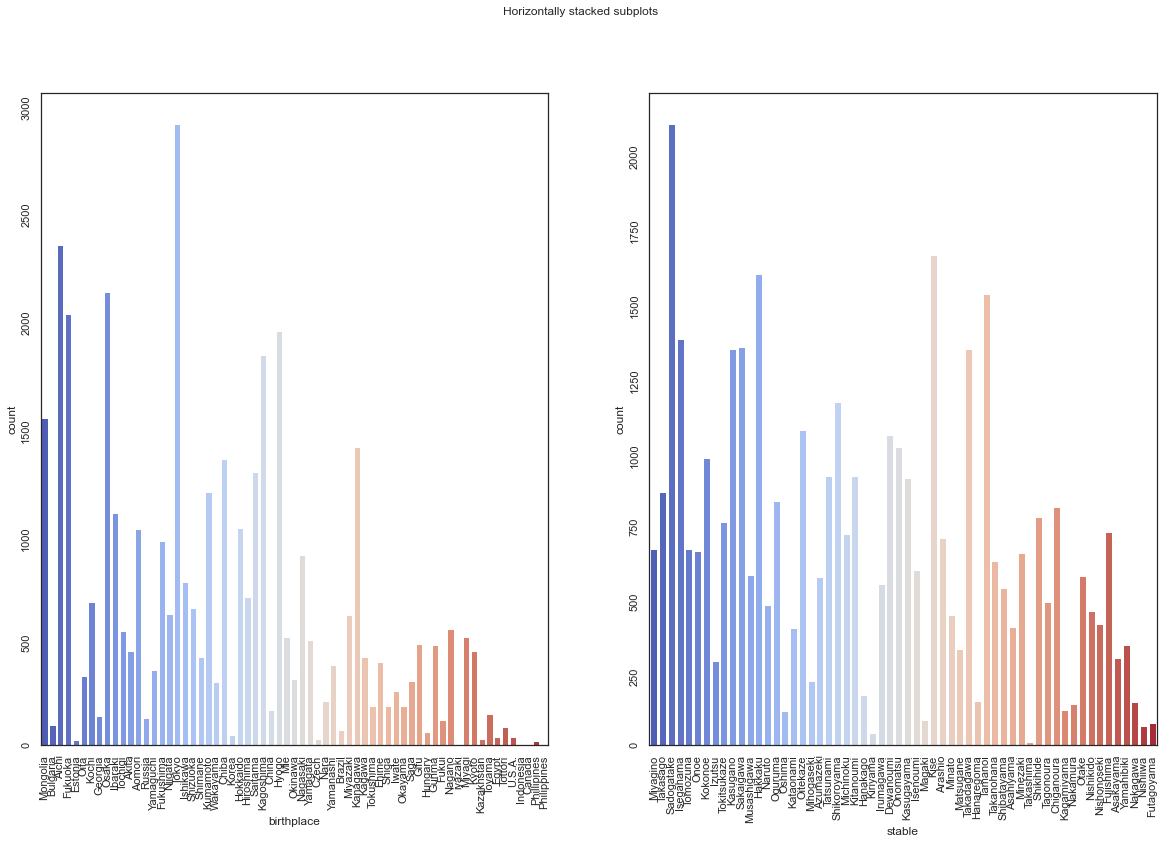

In [135]:
categorical_features = ["birthplace", "stable"]

#get the unqiue categorical data
categorical_info = ranking_2010[categorical_features].describe()
for column in categorical_features:
    categorical_info.loc['values',column] = ranking_2010[column].unique()

print(categorical_info)

#get visual for categorical
fig, (ax2) = plt.subplots(1, len(categorical_features), figsize=(20,12))
fig.suptitle('Horizontally stacked subplots')

for i in range(len(categorical_features)):
    ax2[i].tick_params(labelrotation=90)
    sns.countplot(x=categorical_features[i], palette="coolwarm", data=ranking_2010,ax=ax2[i])

Add the ranking dataframes to the tournament dataframes - this allows for IDs to be used and info such as height, weight, age, etc. to be used. Remove duplicate columns and unneeded and unusable columns, such as stable and birthplace.

In [149]:
def merge_ranking_and_tournament_df(rank_df, tourn_df):

    #merge the tournament and ranking dataframes for wrestler 1, using the name_1, rank_1 and date to match the rows
    tourn_df = pd.merge(tourn_df, rank_df, how='left', left_on=['rank_1', 'name_1','date'], right_on = ['rank_code', 'name','rank_date'])

    

    #rename wrestler_id column
    tourn_df.rename(columns={"height": "height_1", 
                            "weight": "weight_1", 
                            "bmi": "bmi_1",
                            "rank_no": "rank_no_1", 
                            "start_div": "start_div_1",
                            "age": "age_1",
                            "wrestler_id": "ID_1"}, inplace=True)

    #merge the tournament and ranking dataframes for wrestler 2, using the name_2, rank_2 and date to match the rows
    tourn_df = pd.merge(tourn_df, rank_df, how='left', left_on=['rank_2', 'name_2','date'], right_on = ['rank_code', 'name','rank_date'])

    #drop unneeded columns
    tourn_df.drop(["rank_1", "rank_2", "rank_code_x", "name_x", "birthplace_x", "stable_x", "dob_x", "rank_date_x", "all_names_x",
                    "rank_code_y", "name_y", "birthplace_y", "stable_y", "dob_y", "rank_date_y", "all_names_y"], axis=1)

    #rename wrestler_id column
    tourn_df.rename(columns={"date": "tournament_start",
                            "height": "height_2", 
                            "weight": "weight_2", 
                            "bmi": "bmi_2",
                            "rank_no": "rank_no_2", 
                            "start_div": "start_div_2",
                            "age": "age_2",
                            "wrestler_id": "ID_2"}, inplace=True)

    #drop rows without wrestler IDs
    tourn_df = tourn_df.dropna(subset=["ID_1", "ID_2"])
    
    #reset the index after removing the rows
    tourn_df.reset_index(drop=True, inplace=True)

    #rearrange columns
    tourn_df = tourn_df.reindex(columns=["tournament_start", "day_no", "division", 
                                        "ID_1", "wins_1", "losses_1", "missed_1", 
                                        "ID_2", "wins_2", "losses_2", "missed_2", "win_technique", 
                                        "name_1", "rank_no_1", "height_1", "weight_1", "bmi_1", "start_div_1", "age_1",
                                        "name_2", "rank_no_2", "height_2", "weight_2", "bmi_2", "start_div_2", "age_2"])

    return rank_df, tourn_df

ranking_1950, tournament_1950 = merge_ranking_and_tournament_df(ranking_1950, tournament_1950)
ranking_1960, tournament_1960 = merge_ranking_and_tournament_df(ranking_1960, tournament_1960)
ranking_1970, tournament_1970 = merge_ranking_and_tournament_df(ranking_1970, tournament_1970)
ranking_1980, tournament_1980 = merge_ranking_and_tournament_df(ranking_1980, tournament_1980)
ranking_1990, tournament_1990 = merge_ranking_and_tournament_df(ranking_1990, tournament_1990)
ranking_2000, tournament_2000 = merge_ranking_and_tournament_df(ranking_2000, tournament_2000)
ranking_2010, tournament_2010 = merge_ranking_and_tournament_df(ranking_2010, tournament_2010)
ranking_2020, tournament_2020 = merge_ranking_and_tournament_df(ranking_2020, tournament_2020)

Add the amount of bouts each wrestler has been involved in for the current tournament

In [151]:
def add_tournament_bout_count(tourn_df):

    #set the bout count for the tournament for wrestler 1
    tourn_df["tourn_bouts_1"] = tourn_df["wins_1"] + tourn_df["losses_1"] + tourn_df["missed_1"]

    #set the bout count for the tournament for wrestler 2
    tourn_df["tourn_bouts_2"] = tourn_df["wins_2"] + tourn_df["losses_2"] + tourn_df["missed_2"]

    return tourn_df

tournament_1950 = add_tournament_bout_count(tournament_1950)
tournament_1960 = add_tournament_bout_count(tournament_1960)
tournament_1970 = add_tournament_bout_count(tournament_1970)
tournament_1980 = add_tournament_bout_count(tournament_1980)
tournament_1990 = add_tournament_bout_count(tournament_1990)
tournament_2000 = add_tournament_bout_count(tournament_2000)
tournament_2010 = add_tournament_bout_count(tournament_2010)
tournament_2020 = add_tournament_bout_count(tournament_2020)


NOTE: CHANGES AFTER THIS POINT NEED TO BE AS A WHOLE DOCUMENT, SO REMEMBER TO APPEND THE FILES TOGETHER LATER AND CHANGE THE FUNCTIONS TO RUN THROUGH 1 BIG DOC RATHER THAN PER DECADE

This is the current "cleaned_datasets" save point

Append each decade of the ranking and tournament dataframes back together and reset the index.

In [ ]:
# #appending the ranking dataframes
# ranking_df = ranking_1950.append(ranking_1960).append(ranking_1970).append(ranking_1980)
# ranking_df = ranking_df.append(ranking_1990).append(ranking_2000).append(ranking_2010).append(ranking_2020)

# #appending the tournament dataframes
# tournament_df = tournament_1950.append(tournament_1960).append(tournament_1970).append(tournament_1980)
# tournament_df = tournament_df.append(tournament_1990).append(tournament_2000).append(tournament_2010).append(tournament_2020)

# #reset the indexes of the two dataframes
# ranking_df.reset_index(drop=True, inplace=True)
# tournament_df.reset_index(drop=True, inplace=True)

Add record columns for each wrestler for various timeframes, as well as the total up to that point in time. Test with a few different timeframes so the feature selection has a few options to look at. Also get the current tournament's record as new columns.

In [261]:
def add_record_columns(tourn_df): 

    #loop through all bouts in the dataframe
    for bout in tourn_df.index:

        #get IDs
        id_1 = tourn_df["ID_1"].iloc[bout]
        id_2 = tourn_df["ID_2"].iloc[bout]

        #get date information 
        current_date = tourn_df["tournament_start"].iloc[bout]
        previous_date_2y = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(years=2)
        previous_date_1y = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(years=1)
        previous_date_6m = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=6)
        previous_date_3m = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=3)

        #get the day number of the bout
        tournament_day = tourn_df["day_no"].iloc[bout]

        #get the group of bouts between the date ranges
        date_group_2y = (tourn_df['tournament_start'] >= previous_date_2y) & (tourn_df['tournament_start'] < current_date)
        date_group_1y = (tourn_df['tournament_start'] >= previous_date_1y) & (tourn_df['tournament_start'] < current_date)
        date_group_6m = (tourn_df['tournament_start'] >= previous_date_6m) & (tourn_df['tournament_start'] < current_date)
        date_group_3m = (tourn_df['tournament_start'] >= previous_date_3m) & (tourn_df['tournament_start'] < current_date)
        date_group_total = (tourn_df['tournament_start'] < current_date)

        #get the group of new bouts that were not included in "date_group" but need including to ensure a rolling bout-by-bout update
        current_day_group = (tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] < tournament_day)

        #get the group of bouts that need to be removed as they were included in "date_group" but are just over a year old due to their "day_no"
        previous_day_group_2y = (tourn_df['tournament_start'] == previous_date_2y) & (tourn_df['day_no'] < tournament_day)
        previous_day_group_1y = (tourn_df['tournament_start'] == previous_date_1y) & (tourn_df['day_no'] < tournament_day)
        previous_day_group_6m = (tourn_df['tournament_start'] == previous_date_6m) & (tourn_df['day_no'] < tournament_day)
        previous_day_group_3m = (tourn_df['tournament_start'] == previous_date_3m) & (tourn_df['day_no'] < tournament_day)

        #number of wins and losses for each wrestler in a time frame
        wins_2y = tourn_df["ID_1"].loc[date_group_2y].value_counts()
        losses_2y = tourn_df["ID_2"].loc[date_group_2y].value_counts()
        wins_1y = tourn_df["ID_1"].loc[date_group_1y].value_counts()
        losses_1y = tourn_df["ID_2"].loc[date_group_1y].value_counts()
        wins_6m = tourn_df["ID_1"].loc[date_group_6m].value_counts()
        losses_6m = tourn_df["ID_2"].loc[date_group_6m].value_counts()
        wins_3m = tourn_df["ID_1"].loc[date_group_3m].value_counts()
        losses_3m = tourn_df["ID_2"].loc[date_group_3m].value_counts()
        wins_total = tourn_df["ID_1"].loc[date_group_total].value_counts()
        losses_total = tourn_df["ID_2"].loc[date_group_total].value_counts()

        #number of wins and losses for each wrestler in the current tournament up to the current day
        wins_to_add = tourn_df["ID_1"].loc[current_day_group].value_counts()
        losses_to_add = tourn_df["ID_2"].loc[current_day_group].value_counts()

        #number of wins and losses that fall just outside of the timeframe due to the day of the event
        wins_to_subtract_2y = tourn_df["ID_1"].loc[previous_day_group_2y].value_counts()
        losses_to_subtract_2y = tourn_df["ID_2"].loc[previous_day_group_2y].value_counts()
        wins_to_subtract_1y = tourn_df["ID_1"].loc[previous_day_group_1y].value_counts()
        losses_to_subtract_1y = tourn_df["ID_2"].loc[previous_day_group_1y].value_counts()     
        wins_to_subtract_6m = tourn_df["ID_1"].loc[previous_day_group_6m].value_counts()
        losses_to_subtract_6m = tourn_df["ID_2"].loc[previous_day_group_6m].value_counts()
        wins_to_subtract_3m = tourn_df["ID_1"].loc[previous_day_group_3m].value_counts()
        losses_to_subtract_3m = tourn_df["ID_2"].loc[previous_day_group_3m].value_counts()

        #set the records for each wrestler over the given timeframes as new columns
        #2year records
        tourn_df.at[bout,"2y_wins_1"] = ((wins_2y.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_2y.get(id_1) or 0 ))
        tourn_df.at[bout,"2y_losses_1"] = ((losses_2y.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_2y.get(id_1) or 0 ))
        tourn_df.at[bout,"2y_wins_2"] = ((wins_2y.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_2y.get(id_2) or 0 ))
        tourn_df.at[bout,"2y_losses_2"] = ((losses_2y.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_2y.get(id_2) or 0 ))

        #1year records
        tourn_df.at[bout,"1y_wins_1"] = ((wins_1y.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_1y.get(id_1) or 0 ))
        tourn_df.at[bout,"1y_losses_1"] = ((losses_1y.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_1y.get(id_1) or 0 ))
        tourn_df.at[bout,"1y_wins_2"] = ((wins_1y.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_1y.get(id_2) or 0 ))
        tourn_df.at[bout,"1y_losses_2"] = ((losses_1y.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_1y.get(id_2) or 0 ))

        #6months records
        tourn_df.at[bout,"6m_wins_1"] = ((wins_6m.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_6m.get(id_1) or 0 ))
        tourn_df.at[bout,"6m_losses_1"] = ((losses_6m.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_6m.get(id_1) or 0 ))
        tourn_df.at[bout,"6m_wins_2"] = ((wins_6m.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_6m.get(id_2) or 0 ))
        tourn_df.at[bout,"6m_losses_2"] = ((losses_6m.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_6m.get(id_2) or 0 ))

        #3months records
        tourn_df.at[bout,"3m_wins_1"] = ((wins_3m.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_3m.get(id_1) or 0 ))
        tourn_df.at[bout,"3m_losses_1"] = ((losses_3m.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_3m.get(id_1) or 0 ))
        tourn_df.at[bout,"3m_wins_2"] = ((wins_3m.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_3m.get(id_2) or 0 ))
        tourn_df.at[bout,"3m_losses_2"] = ((losses_3m.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_3m.get(id_2) or 0 ))

        #total records
        tourn_df.at[bout,"total_wins_1"] = (wins_total.get(id_1) or 0 ) + (wins_to_add.get(id_1) or 0 ) 
        tourn_df.at[bout,"total_losses_1"] = (losses_total.get(id_1) or 0 ) + (losses_to_add.get(id_1) or 0 )
        tourn_df.at[bout,"total_wins_2"] = (wins_total.get(id_2) or 0 ) + (wins_to_add.get(id_2) or 0 )
        tourn_df.at[bout,"total_losses_2"] = (losses_total.get(id_2) or 0 ) + (losses_to_add.get(id_2) or 0 ) 

        #current records of the wrestlers in the tournament, updated before the bout is played
        tourn_df.at[bout,"cur_tourn_wins_1"] = (wins_to_add.get(id_1) or 0 )
        tourn_df.at[bout,"cur_tourn_losses_1"] = (losses_to_add.get(id_1) or 0)
        tourn_df.at[bout,"cur_tourn_wins_2"] = (wins_to_add.get(id_2) or 0 ) 
        tourn_df.at[bout,"cur_tourn_losses_2"] = (losses_to_add.get(id_2) or 0 ) 

    #get the total number of bouts each wrestler has had in the timeframes
    tourn_df["2y_total_1"] = (tourn_df["2y_wins_1"] + tourn_df["2y_losses_1"])
    tourn_df["2y_total_2"] = (tourn_df["2y_wins_2"] + tourn_df["2y_losses_2"])
    tourn_df["1y_total_1"] = (tourn_df["1y_wins_1"] + tourn_df["1y_losses_1"])
    tourn_df["1y_total_2"] = (tourn_df["1y_wins_2"] + tourn_df["1y_losses_2"])
    tourn_df["6m_total_1"] = (tourn_df["6m_wins_1"] + tourn_df["6m_losses_1"])
    tourn_df["6m_total_2"] = (tourn_df["6m_wins_2"] + tourn_df["6m_losses_2"])
    tourn_df["3m_total_1"] = (tourn_df["3m_wins_1"] + tourn_df["3m_losses_1"])
    tourn_df["3m_total_2"] = (tourn_df["3m_wins_2"] + tourn_df["3m_losses_2"])
    tourn_df["cur_tourn_total_1"] = (tourn_df["cur_tourn_wins_1"] + tourn_df["cur_tourn_losses_1"])
    tourn_df["cur_tourn_total_2"] = (tourn_df["cur_tourn_wins_2"] + tourn_df["cur_tourn_losses_2"])

    #set the win percentages for the timeframes
    tourn_df["2y_win%_1"] = ((tourn_df["2y_wins_1"] / tourn_df["2y_total_1"]) * 100).fillna(0)
    tourn_df["2y_win%_2"] = ((tourn_df["2y_wins_2"] / tourn_df["2y_total_2"]) * 100).fillna(0)
    tourn_df["1y_win%_1"] = ((tourn_df["1y_wins_1"] / tourn_df["1y_total_1"]) * 100).fillna(0)
    tourn_df["1y_win%_2"] = ((tourn_df["1y_wins_2"] / tourn_df["1y_total_2"]) * 100).fillna(0)
    tourn_df["6m_win%_1"] = ((tourn_df["6m_wins_1"] / tourn_df["6m_total_1"]) * 100).fillna(0)
    tourn_df["6m_win%_2"] = ((tourn_df["6m_wins_2"] / tourn_df["6m_total_2"]) * 100).fillna(0)
    tourn_df["3m_win%_1"] = ((tourn_df["3m_wins_1"] / tourn_df["3m_total_1"]) * 100).fillna(0)
    tourn_df["3m_win%_2"] = ((tourn_df["3m_wins_2"] / tourn_df["3m_total_2"]) * 100).fillna(0)

    return tourn_df

tournament_1950 = add_record_columns(tournament_1950)
tournament_1960 = add_record_columns(tournament_1960)
tournament_1970 = add_record_columns(tournament_1970)
tournament_1980 = add_record_columns(tournament_1980)
tournament_1990 = add_record_columns(tournament_1990)
tournament_2000 = add_record_columns(tournament_2000)
tournament_2010 = add_record_columns(tournament_2010)
tournament_2020 = add_record_columns(tournament_2020)

Add recent Makuuchi records and win percentage for each wrestler. 

In [262]:
def add_makuuchi_records(tourn_df): 

    #loop through all bouts in the dataframe
    for bout in tourn_df.index:

        #get IDs
        id_1 = tourn_df["ID_1"].iloc[bout]
        id_2 = tourn_df["ID_2"].iloc[bout]

        #get date information 
        current_date = tourn_df["tournament_start"].iloc[bout]
        previous_date_2y = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(years=2)
        previous_date_1y = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(years=1)
        previous_date_6m = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=6)
        previous_date_3m = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=3)

        #get the day number of the bout
        tournament_day = tourn_df["day_no"].iloc[bout]

        #get the group of bouts between the date ranges
        date_group_2y = (tourn_df['tournament_start'] >= previous_date_2y) & (tourn_df['tournament_start'] < current_date) & (tourn_df["division"] == "Makuuchi")
        date_group_1y = (tourn_df['tournament_start'] >= previous_date_1y) & (tourn_df['tournament_start'] < current_date) & (tourn_df["division"] == "Makuuchi")
        date_group_6m = (tourn_df['tournament_start'] >= previous_date_6m) & (tourn_df['tournament_start'] < current_date) & (tourn_df["division"] == "Makuuchi")
        date_group_3m = (tourn_df['tournament_start'] >= previous_date_3m) & (tourn_df['tournament_start'] < current_date) & (tourn_df["division"] == "Makuuchi")
        date_group_total = (tourn_df['tournament_start'] < current_date) & (tourn_df["division"] == "Makuuchi")

        #get the group of new bouts that were not included in "date_group" but need including to ensure a rolling bout-by-bout update
        current_day_group = (tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] < tournament_day) & (tourn_df["division"] == "Makuuchi")

        #get the group of bouts that need to be removed as they were included in "date_group" but are just over a year old due to their "day_no"
        previous_day_group_2y = (tourn_df['tournament_start'] == previous_date_2y) & (tourn_df['day_no'] < tournament_day) & (tourn_df["division"] == "Makuuchi")
        previous_day_group_1y = (tourn_df['tournament_start'] == previous_date_1y) & (tourn_df['day_no'] < tournament_day) & (tourn_df["division"] == "Makuuchi")
        previous_day_group_6m = (tourn_df['tournament_start'] == previous_date_6m) & (tourn_df['day_no'] < tournament_day) & (tourn_df["division"] == "Makuuchi")
        previous_day_group_3m = (tourn_df['tournament_start'] == previous_date_3m) & (tourn_df['day_no'] < tournament_day) & (tourn_df["division"] == "Makuuchi")

        #number of wins and losses for each wrestler in a time frame
        wins_2y = tourn_df["ID_1"].loc[date_group_2y].value_counts()
        losses_2y = tourn_df["ID_2"].loc[date_group_2y].value_counts()
        wins_1y = tourn_df["ID_1"].loc[date_group_1y].value_counts()
        losses_1y = tourn_df["ID_2"].loc[date_group_1y].value_counts()
        wins_6m = tourn_df["ID_1"].loc[date_group_6m].value_counts()
        losses_6m = tourn_df["ID_2"].loc[date_group_6m].value_counts()
        wins_3m = tourn_df["ID_1"].loc[date_group_3m].value_counts()
        losses_3m = tourn_df["ID_2"].loc[date_group_3m].value_counts()
        wins_total = tourn_df["ID_1"].loc[date_group_total].value_counts()
        losses_total = tourn_df["ID_2"].loc[date_group_total].value_counts()

        #number of wins and losses for each wrestler in the current tournament up to the current day
        wins_to_add = tourn_df["ID_1"].loc[current_day_group].value_counts()
        losses_to_add = tourn_df["ID_2"].loc[current_day_group].value_counts()

        #number of wins and losses that fall just outside of the timeframe due to the day of the event
        wins_to_subtract_2y = tourn_df["ID_1"].loc[previous_day_group_2y].value_counts()
        losses_to_subtract_2y = tourn_df["ID_2"].loc[previous_day_group_2y].value_counts()
        wins_to_subtract_1y = tourn_df["ID_1"].loc[previous_day_group_1y].value_counts()
        losses_to_subtract_1y = tourn_df["ID_2"].loc[previous_day_group_1y].value_counts()     
        wins_to_subtract_6m = tourn_df["ID_1"].loc[previous_day_group_6m].value_counts()
        losses_to_subtract_6m = tourn_df["ID_2"].loc[previous_day_group_6m].value_counts()
        wins_to_subtract_3m = tourn_df["ID_1"].loc[previous_day_group_3m].value_counts()
        losses_to_subtract_3m = tourn_df["ID_2"].loc[previous_day_group_3m].value_counts()

        #set the records for each wrestler over the given timeframes as new columns
        #2year records
        tourn_df.at[bout,"2y_makuuchi_wins_1"] = ((wins_2y.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_2y.get(id_1) or 0 ))
        tourn_df.at[bout,"2y_makuuchi_losses_1"] = ((losses_2y.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_2y.get(id_1) or 0 ))
        tourn_df.at[bout,"2y_makuuchi_wins_2"] = ((wins_2y.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_2y.get(id_2) or 0 ))
        tourn_df.at[bout,"2y_makuuchi_losses_2"] = ((losses_2y.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_2y.get(id_2) or 0 ))

        #1year records
        tourn_df.at[bout,"1y_makuuchi_wins_1"] = ((wins_1y.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_1y.get(id_1) or 0 ))
        tourn_df.at[bout,"1y_makuuchi_losses_1"] = ((losses_1y.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_1y.get(id_1) or 0 ))
        tourn_df.at[bout,"1y_makuuchi_wins_2"] = ((wins_1y.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_1y.get(id_2) or 0 ))
        tourn_df.at[bout,"1y_makuuchi_losses_2"] = ((losses_1y.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_1y.get(id_2) or 0 ))

        #6months records
        tourn_df.at[bout,"6m_makuuchi_wins_1"] = ((wins_6m.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_6m.get(id_1) or 0 ))
        tourn_df.at[bout,"6m_makuuchi_losses_1"] = ((losses_6m.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_6m.get(id_1) or 0 ))
        tourn_df.at[bout,"6m_makuuchi_wins_2"] = ((wins_6m.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_6m.get(id_2) or 0 ))
        tourn_df.at[bout,"6m_makuuchi_losses_2"] = ((losses_6m.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_6m.get(id_2) or 0 ))

        #3months records
        tourn_df.at[bout,"3m_makuuchi_wins_1"] = ((wins_3m.get(id_1) or 0 ) + 
                                        (wins_to_add.get(id_1) or 0 ) - 
                                        (wins_to_subtract_3m.get(id_1) or 0 ))
        tourn_df.at[bout,"3m_makuuchi_losses_1"] = ((losses_3m.get(id_1) or 0 ) + 
                                        (losses_to_add.get(id_1) or 0 ) - 
                                        (losses_to_subtract_3m.get(id_1) or 0 ))
        tourn_df.at[bout,"3m_makuuchi_wins_2"] = ((wins_3m.get(id_2) or 0 ) + 
                                        (wins_to_add.get(id_2) or 0 ) - 
                                        (wins_to_subtract_3m.get(id_2) or 0 ))
        tourn_df.at[bout,"3m_makuuchi_losses_2"] = ((losses_3m.get(id_2) or 0 ) + 
                                        (losses_to_add.get(id_2) or 0 ) - 
                                        (losses_to_subtract_3m.get(id_2) or 0 ))

        #total records
        tourn_df.at[bout,"total_makuuchi_wins_1"] = (wins_total.get(id_1) or 0 ) + (wins_to_add.get(id_1) or 0 )
        tourn_df.at[bout,"total_makuuchi_losses_1"] = (losses_total.get(id_1) or 0 ) + (losses_to_add.get(id_1) or 0 ) 
        tourn_df.at[bout,"total_makuuchi_wins_2"] = (wins_total.get(id_2) or 0 ) + (wins_to_add.get(id_2) or 0 )
        tourn_df.at[bout,"total_makuuchi_losses_2"] = (losses_total.get(id_2) or 0 ) + (losses_to_add.get(id_2) or 0 )

    #get the total number of bouts each wrestler has had in the timeframes
    tourn_df["2y_makuuchi_total_1"] = (tourn_df["2y_makuuchi_wins_1"] + tourn_df["2y_makuuchi_losses_1"])
    tourn_df["2y_makuuchi_total_2"] = (tourn_df["2y_makuuchi_wins_2"] + tourn_df["2y_makuuchi_losses_2"])
    tourn_df["1y_makuuchi_total_1"] = (tourn_df["1y_makuuchi_wins_1"] + tourn_df["1y_makuuchi_losses_1"])
    tourn_df["1y_makuuchi_total_2"] = (tourn_df["1y_makuuchi_wins_2"] + tourn_df["1y_makuuchi_losses_2"])
    tourn_df["6m_makuuchi_total_1"] = (tourn_df["6m_makuuchi_wins_1"] + tourn_df["6m_makuuchi_losses_1"])
    tourn_df["6m_makuuchi_total_2"] = (tourn_df["6m_makuuchi_wins_2"] + tourn_df["6m_makuuchi_losses_2"])
    tourn_df["3m_makuuchi_total_1"] = (tourn_df["3m_makuuchi_wins_1"] + tourn_df["3m_makuuchi_losses_1"])
    tourn_df["3m_makuuchi_total_2"] = (tourn_df["3m_makuuchi_wins_2"] + tourn_df["3m_makuuchi_losses_2"])
    tourn_df["makuuchi_total_1"] = (tourn_df["total_makuuchi_wins_1"] + tourn_df["total_makuuchi_losses_1"])
    tourn_df["makuuchi_total_2"] = (tourn_df["total_makuuchi_wins_2"] + tourn_df["total_makuuchi_losses_2"])

    #set the win percentages for the timeframes
    tourn_df["2y_makuuchi_win%_1"] = ((tourn_df["2y_makuuchi_wins_1"] / tourn_df["2y_makuuchi_total_1"]) * 100).fillna(0)
    tourn_df["2y_makuuchi_win%_2"] = ((tourn_df["2y_makuuchi_wins_2"] / tourn_df["2y_makuuchi_total_2"]) * 100).fillna(0)
    tourn_df["1y_makuuchi_win%_1"] = ((tourn_df["1y_makuuchi_wins_1"] / tourn_df["1y_makuuchi_total_1"]) * 100).fillna(0)
    tourn_df["1y_makuuchi_win%_2"] = ((tourn_df["1y_makuuchi_wins_2"] / tourn_df["1y_makuuchi_total_2"]) * 100).fillna(0)
    tourn_df["6m_makuuchi_win%_1"] = ((tourn_df["6m_makuuchi_wins_1"] / tourn_df["6m_makuuchi_total_1"]) * 100).fillna(0)
    tourn_df["6m_makuuchi_win%_2"] = ((tourn_df["6m_makuuchi_wins_2"] / tourn_df["6m_makuuchi_total_2"]) * 100).fillna(0)
    tourn_df["3m_makuuchi_win%_1"] = ((tourn_df["3m_makuuchi_wins_1"] / tourn_df["3m_makuuchi_total_1"]) * 100).fillna(0)
    tourn_df["3m_makuuchi_win%_2"] = ((tourn_df["3m_makuuchi_wins_2"] / tourn_df["3m_makuuchi_total_2"]) * 100).fillna(0)
    tourn_df["total_makuuchi_win%_1"] = ((tourn_df["total_makuuchi_wins_1"] / tourn_df["makuuchi_total_1"]) * 100).fillna(0)
    tourn_df["total_makuuchi_win%_2"] = ((tourn_df["total_makuuchi_wins_2"] / tourn_df["makuuchi_total_2"]) * 100).fillna(0)

    return tourn_df

tournament_1950 = add_makuuchi_records(tournament_1950)
tournament_1960 = add_makuuchi_records(tournament_1960)
tournament_1970 = add_makuuchi_records(tournament_1970)
tournament_1980 = add_makuuchi_records(tournament_1980)
tournament_1990 = add_makuuchi_records(tournament_1990)
tournament_2000 = add_makuuchi_records(tournament_2000)
tournament_2010 = add_makuuchi_records(tournament_2010)
tournament_2020 = add_makuuchi_records(tournament_2020)



Add columns for Makuchi debuts. 
Note: The data close to 1956 may not accurately reflect whether it was a Makuuchi debut as they may have appeared in the division earlier in their career before the data was available. As the 1950's data will be dropped later this should not be as relevant and will mean only wrestlers that have been out of the top division for 6+ years will be incorrectly flagged.

In [263]:
def add_makuuchi_debut_column(tourn_df): 

        #create a new column for debuts, starting each wrestler as 0 (no)
        tourn_df["makuuchi_debut_1"] = 0
        tourn_df["makuuchi_debut_2"] = 0

        #start a year after the data starts to prevent too many incorrect debut labels
        tourn_df_post_1956 = tourn_df.loc[(tourn_df['tournament_start'] >= "1957-01-01")]

        for bout in tourn_df_post_1956.index:

                #get the number of bouts the wrestler had competed in at that point
                current_bout_total_1 = tourn_df["makuuchi_total_1"].iloc[bout]
                current_bout_total_2 = tourn_df["makuuchi_total_2"].iloc[bout]

                #get the division
                division = tourn_df["division"].iloc[bout]

                #check the first makuuchi appearance and set debut to 1 (yes) 
                if current_bout_total_1 == 0 and division == "Makuuchi":

                        tourn_df.at[bout,"makuuchi_debut_1"] = 1

                if current_bout_total_2 == 0 and division == "Makuuchi":

                        tourn_df.at[bout,"makuuchi_debut_2"] = 1
                   
        return tourn_df

tournament_1950 = add_makuuchi_debut_column(tournament_1950) 
tournament_1960 = add_makuuchi_debut_column(tournament_1960)
tournament_1970 = add_makuuchi_debut_column(tournament_1970)
tournament_1980 = add_makuuchi_debut_column(tournament_1980)
tournament_1990 = add_makuuchi_debut_column(tournament_1990)
tournament_2000 = add_makuuchi_debut_column(tournament_2000)
tournament_2010 = add_makuuchi_debut_column(tournament_2010)
tournament_2020 = add_makuuchi_debut_column(tournament_2020)

Add a points based column for each wrestler's record, taking leagues into account: 
Rules for wins: Top division = 6pts, whereas sixth division = 1pt. 
Rules for losses: Top division = -1pt whereas sixth division = -6pts. etc.
Use various timeframes as before i.e. total, 2 year, 1 year, 6 month, 3 months.

Note: remember to add the missed bouts here too

In [6]:
def add_record_points(tourn_df): 

    #loop through all bouts in the dataframe
    for bout in tourn_df.index:

        #get IDs
        id_1 = tourn_df["ID_1"].iloc[bout]
        id_2 = tourn_df["ID_2"].iloc[bout]

        #get date information 
        current_date = tourn_df["tournament_start"].iloc[bout]
        previous_date_2y = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(years=2)
        previous_date_1y = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(years=1)
        previous_date_6m = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=6)
        previous_date_3m = tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=3)

        #get the day number of the bout
        tournament_day = tourn_df["day_no"].iloc[bout]

        #get the group of new bouts that were not included in "date_group" but need including to ensure a rolling bout-by-bout update
        makuuchi_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Makuuchi"))
        juryo_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Juryo"))
        makushita_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Makushita"))
        sandanme_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Sandanme"))
        jonidan_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Jonidan"))
        jonokuchi_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Jonokuchi"))

        #get the group of bouts between the date ranges for each division
        makuuchi_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makuuchi"))
        juryo_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Juryo"))
        makushita_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makushita"))
        sandanme_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Sandanme"))
        jonidan_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonidan"))
        jonokuchi_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonokuchi"))

        makuuchi_date_group_1y = ((tourn_df['tournament_start'] >= previous_date_1y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makuuchi"))
        juryo_date_group_1y = ((tourn_df['tournament_start'] >= previous_date_1y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Juryo"))
        makushita_date_group_1y = ((tourn_df['tournament_start'] >= previous_date_1y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makushita"))
        sandanme_date_group_1y = ((tourn_df['tournament_start'] >= previous_date_1y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Sandanme"))
        jonidan_date_group_1y = ((tourn_df['tournament_start'] >= previous_date_1y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonidan"))
        jonokuchi_date_group_1y = ((tourn_df['tournament_start'] >= previous_date_1y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonokuchi"))

        makuuchi_date_group_6m = ((tourn_df['tournament_start'] >= previous_date_6m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makuuchi"))
        juryo_date_group_6m = ((tourn_df['tournament_start'] >= previous_date_6m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Juryo"))
        makushita_date_group_6m = ((tourn_df['tournament_start'] >= previous_date_6m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makushita"))
        sandanme_date_group_6m = ((tourn_df['tournament_start'] >= previous_date_6m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Sandanme"))
        jonidan_date_group_6m = ((tourn_df['tournament_start'] >= previous_date_6m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonidan"))
        jonokuchi_date_group_6m = ((tourn_df['tournament_start'] >= previous_date_6m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonokuchi"))

        makuuchi_date_group_3m = ((tourn_df['tournament_start'] >= previous_date_3m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makuuchi"))
        juryo_date_group_3m = ((tourn_df['tournament_start'] >= previous_date_3m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Juryo"))
        makushita_date_group_3m = ((tourn_df['tournament_start'] >= previous_date_3m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makushita"))
        sandanme_date_group_3m = ((tourn_df['tournament_start'] >= previous_date_3m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Sandanme"))
        jonidan_date_group_3m = ((tourn_df['tournament_start'] >= previous_date_3m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonidan"))
        jonokuchi_date_group_3m = ((tourn_df['tournament_start'] >= previous_date_3m) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonokuchi"))

        #get the group of bouts that need to be removed as they were included in "date_group" but are just over a year old due to their "day_no"
        makuuchi_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makuuchi"))
        juryo_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Juryo"))
        makushita_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makushita"))
        sandanme_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Sandanme"))
        jonidan_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonidan"))
        jonokuchi_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonokuchi"))

        makuuchi_previous_day_group_1y = ((tourn_df['tournament_start'] == previous_date_1y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makuuchi"))
        juryo_previous_day_group_1y = ((tourn_df['tournament_start'] == previous_date_1y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Juryo"))
        makushita_previous_day_group_1y = ((tourn_df['tournament_start'] == previous_date_1y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makushita"))
        sandanme_previous_day_group_1y = ((tourn_df['tournament_start'] == previous_date_1y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Sandanme"))
        jonidan_previous_day_group_1y = ((tourn_df['tournament_start'] == previous_date_1y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonidan"))
        jonokuchi_previous_day_group_1y = ((tourn_df['tournament_start'] == previous_date_1y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonokuchi"))

        makuuchi_previous_day_group_6m = ((tourn_df['tournament_start'] == previous_date_6m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makuuchi"))
        juryo_previous_day_group_6m = ((tourn_df['tournament_start'] == previous_date_6m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Juryo"))
        makushita_previous_day_group_6m = ((tourn_df['tournament_start'] == previous_date_6m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makushita"))
        sandanme_previous_day_group_6m = ((tourn_df['tournament_start'] == previous_date_6m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Sandanme"))
        jonidan_previous_day_group_6m = ((tourn_df['tournament_start'] == previous_date_6m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonidan"))
        jonokuchi_previous_day_group_6m = ((tourn_df['tournament_start'] == previous_date_6m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonokuchi"))

        makuuchi_previous_day_group_3m = ((tourn_df['tournament_start'] == previous_date_3m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makuuchi"))
        juryo_previous_day_group_3m = ((tourn_df['tournament_start'] == previous_date_3m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Juryo"))
        makushita_previous_day_group_3m = ((tourn_df['tournament_start'] == previous_date_3m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makushita"))
        sandanme_previous_day_group_3m = ((tourn_df['tournament_start'] == previous_date_3m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Sandanme"))
        jonidan_previous_day_group_3m = ((tourn_df['tournament_start'] == previous_date_3m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonidan"))
        jonokuchi_previous_day_group_3m = ((tourn_df['tournament_start'] == previous_date_3m) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonokuchi"))

        #number of wins and losses for each wrestler in the current tournament up to the current day
        makuuchi_wins_to_add = tourn_df["ID_1"].loc[makuuchi_current_day_group].value_counts()
        makuuchi_losses_to_add = tourn_df["ID_2"].loc[makuuchi_current_day_group].value_counts()
        juryo_wins_to_add = tourn_df["ID_1"].loc[juryo_current_day_group].value_counts()
        juryo_losses_to_add = tourn_df["ID_2"].loc[juryo_current_day_group].value_counts()
        makushita_wins_to_add = tourn_df["ID_1"].loc[makushita_current_day_group].value_counts()
        makushita_losses_to_add = tourn_df["ID_2"].loc[makushita_current_day_group].value_counts()
        sandanme_wins_to_add = tourn_df["ID_1"].loc[sandanme_current_day_group].value_counts()
        sandanme_losses_to_add = tourn_df["ID_2"].loc[sandanme_current_day_group].value_counts()
        jonidan_wins_to_add = tourn_df["ID_1"].loc[jonidan_current_day_group].value_counts()
        jonidan_losses_to_add = tourn_df["ID_2"].loc[jonidan_current_day_group].value_counts()
        jonokuchi_wins_to_add = tourn_df["ID_1"].loc[jonokuchi_current_day_group].value_counts()
        jonokuchi_losses_to_add = tourn_df["ID_2"].loc[jonokuchi_current_day_group].value_counts()

        #number of wins and losses for each wrestler in a time frame
        makuuchi_wins_2y = tourn_df["ID_1"].loc[makuuchi_date_group_2y].value_counts()
        makuuchi_losses_2y = tourn_df["ID_2"].loc[makuuchi_date_group_2y].value_counts()
        juryo_wins_2y = tourn_df["ID_1"].loc[juryo_date_group_2y].value_counts()
        juryo_losses_2y = tourn_df["ID_2"].loc[juryo_date_group_2y].value_counts()
        makushita_wins_2y = tourn_df["ID_1"].loc[makushita_date_group_2y].value_counts()
        makushita_losses_2y = tourn_df["ID_2"].loc[makushita_date_group_2y].value_counts()
        sandanme_wins_2y = tourn_df["ID_1"].loc[sandanme_date_group_2y].value_counts()
        sandanme_losses_2y = tourn_df["ID_2"].loc[sandanme_date_group_2y].value_counts()
        jonidan_wins_2y = tourn_df["ID_1"].loc[jonidan_date_group_2y].value_counts()
        jonidan_losses_2y = tourn_df["ID_2"].loc[jonidan_date_group_2y].value_counts()
        jonokuchi_wins_2y = tourn_df["ID_1"].loc[jonokuchi_date_group_2y].value_counts()
        jonokuchi_losses_2y = tourn_df["ID_2"].loc[jonokuchi_date_group_2y].value_counts()

        makuuchi_wins_1y = tourn_df["ID_1"].loc[makuuchi_date_group_1y].value_counts()
        makuuchi_losses_1y = tourn_df["ID_2"].loc[makuuchi_date_group_1y].value_counts()
        juryo_wins_1y = tourn_df["ID_1"].loc[juryo_date_group_1y].value_counts()
        juryo_losses_1y = tourn_df["ID_2"].loc[juryo_date_group_1y].value_counts()
        makushita_wins_1y = tourn_df["ID_1"].loc[makushita_date_group_1y].value_counts()
        makushita_losses_1y = tourn_df["ID_2"].loc[makushita_date_group_1y].value_counts()
        sandanme_wins_1y = tourn_df["ID_1"].loc[sandanme_date_group_1y].value_counts()
        sandanme_losses_1y = tourn_df["ID_2"].loc[sandanme_date_group_1y].value_counts()
        jonidan_wins_1y = tourn_df["ID_1"].loc[jonidan_date_group_1y].value_counts()
        jonidan_losses_1y = tourn_df["ID_2"].loc[jonidan_date_group_1y].value_counts()
        jonokuchi_wins_1y = tourn_df["ID_1"].loc[jonokuchi_date_group_1y].value_counts()
        jonokuchi_losses_1y = tourn_df["ID_2"].loc[jonokuchi_date_group_1y].value_counts()

        makuuchi_wins_6m = tourn_df["ID_1"].loc[makuuchi_date_group_6m].value_counts()
        makuuchi_losses_6m = tourn_df["ID_2"].loc[makuuchi_date_group_6m].value_counts()
        juryo_wins_6m = tourn_df["ID_1"].loc[juryo_date_group_6m].value_counts()
        juryo_losses_6m = tourn_df["ID_2"].loc[juryo_date_group_6m].value_counts()
        makushita_wins_6m = tourn_df["ID_1"].loc[makushita_date_group_6m].value_counts()
        makushita_losses_6m = tourn_df["ID_2"].loc[makushita_date_group_6m].value_counts()
        sandanme_wins_6m = tourn_df["ID_1"].loc[sandanme_date_group_6m].value_counts()
        sandanme_losses_6m = tourn_df["ID_2"].loc[sandanme_date_group_6m].value_counts()
        jonidan_wins_6m = tourn_df["ID_1"].loc[jonidan_date_group_6m].value_counts()
        jonidan_losses_6m = tourn_df["ID_2"].loc[jonidan_date_group_6m].value_counts()
        jonokuchi_wins_6m = tourn_df["ID_1"].loc[jonokuchi_date_group_6m].value_counts()
        jonokuchi_losses_6m = tourn_df["ID_2"].loc[jonokuchi_date_group_6m].value_counts()

        makuuchi_wins_3m = tourn_df["ID_1"].loc[makuuchi_date_group_3m].value_counts()
        makuuchi_losses_3m = tourn_df["ID_2"].loc[makuuchi_date_group_3m].value_counts()
        juryo_wins_3m = tourn_df["ID_1"].loc[juryo_date_group_3m].value_counts()
        juryo_losses_3m = tourn_df["ID_2"].loc[juryo_date_group_3m].value_counts()
        makushita_wins_3m = tourn_df["ID_1"].loc[makushita_date_group_3m].value_counts()
        makushita_losses_3m = tourn_df["ID_2"].loc[makushita_date_group_3m].value_counts()
        sandanme_wins_3m = tourn_df["ID_1"].loc[sandanme_date_group_3m].value_counts()
        sandanme_losses_3m = tourn_df["ID_2"].loc[sandanme_date_group_3m].value_counts()
        jonidan_wins_3m = tourn_df["ID_1"].loc[jonidan_date_group_3m].value_counts()
        jonidan_losses_3m = tourn_df["ID_2"].loc[jonidan_date_group_3m].value_counts()
        jonokuchi_wins_3m = tourn_df["ID_1"].loc[jonokuchi_date_group_3m].value_counts()
        jonokuchi_losses_3m = tourn_df["ID_2"].loc[jonokuchi_date_group_3m].value_counts()

        #number of wins and losses that fall just outside of the timeframe due to the day of the event
        makuuchi_wins_to_subtract_2y = tourn_df["ID_1"].loc[makuuchi_previous_day_group_2y].value_counts()
        makuuchi_losses_to_subtract_2y = tourn_df["ID_2"].loc[makuuchi_previous_day_group_2y].value_counts()
        juryo_wins_to_subtract_2y = tourn_df["ID_1"].loc[juryo_previous_day_group_2y].value_counts()
        juryo_losses_to_subtract_2y = tourn_df["ID_2"].loc[juryo_previous_day_group_2y].value_counts()
        makushita_wins_to_subtract_2y = tourn_df["ID_1"].loc[makushita_previous_day_group_2y].value_counts()
        makushita_losses_to_subtract_2y = tourn_df["ID_2"].loc[makushita_previous_day_group_2y].value_counts()
        sandanme_wins_to_subtract_2y = tourn_df["ID_1"].loc[sandanme_previous_day_group_2y].value_counts()
        sandanme_losses_to_subtract_2y = tourn_df["ID_2"].loc[sandanme_previous_day_group_2y].value_counts()
        jonidan_wins_to_subtract_2y = tourn_df["ID_1"].loc[jonidan_previous_day_group_2y].value_counts()
        jonidan_losses_to_subtract_2y = tourn_df["ID_2"].loc[jonidan_previous_day_group_2y].value_counts()
        jonokuchi_wins_to_subtract_2y = tourn_df["ID_1"].loc[jonokuchi_previous_day_group_2y].value_counts()
        jonokuchi_losses_to_subtract_2y = tourn_df["ID_2"].loc[jonokuchi_previous_day_group_2y].value_counts()

        makuuchi_wins_to_subtract_1y = tourn_df["ID_1"].loc[makuuchi_previous_day_group_1y].value_counts()
        makuuchi_losses_to_subtract_1y = tourn_df["ID_2"].loc[makuuchi_previous_day_group_1y].value_counts()
        juryo_wins_to_subtract_1y = tourn_df["ID_1"].loc[juryo_previous_day_group_1y].value_counts()
        juryo_losses_to_subtract_1y = tourn_df["ID_2"].loc[juryo_previous_day_group_1y].value_counts()
        makushita_wins_to_subtract_1y = tourn_df["ID_1"].loc[makushita_previous_day_group_1y].value_counts()
        makushita_losses_to_subtract_1y = tourn_df["ID_2"].loc[makushita_previous_day_group_1y].value_counts()
        sandanme_wins_to_subtract_1y = tourn_df["ID_1"].loc[sandanme_previous_day_group_1y].value_counts()
        sandanme_losses_to_subtract_1y = tourn_df["ID_2"].loc[sandanme_previous_day_group_1y].value_counts()
        jonidan_wins_to_subtract_1y = tourn_df["ID_1"].loc[jonidan_previous_day_group_1y].value_counts()
        jonidan_losses_to_subtract_1y = tourn_df["ID_2"].loc[jonidan_previous_day_group_1y].value_counts()
        jonokuchi_wins_to_subtract_1y = tourn_df["ID_1"].loc[jonokuchi_previous_day_group_1y].value_counts()
        jonokuchi_losses_to_subtract_1y = tourn_df["ID_2"].loc[jonokuchi_previous_day_group_1y].value_counts()

        makuuchi_wins_to_subtract_6m = tourn_df["ID_1"].loc[makuuchi_previous_day_group_6m].value_counts()
        makuuchi_losses_to_subtract_6m = tourn_df["ID_2"].loc[makuuchi_previous_day_group_6m].value_counts()
        juryo_wins_to_subtract_6m = tourn_df["ID_1"].loc[juryo_previous_day_group_6m].value_counts()
        juryo_losses_to_subtract_6m = tourn_df["ID_2"].loc[juryo_previous_day_group_6m].value_counts()
        makushita_wins_to_subtract_6m = tourn_df["ID_1"].loc[makushita_previous_day_group_6m].value_counts()
        makushita_losses_to_subtract_6m = tourn_df["ID_2"].loc[makushita_previous_day_group_6m].value_counts()
        sandanme_wins_to_subtract_6m = tourn_df["ID_1"].loc[sandanme_previous_day_group_6m].value_counts()
        sandanme_losses_to_subtract_6m = tourn_df["ID_2"].loc[sandanme_previous_day_group_6m].value_counts()
        jonidan_wins_to_subtract_6m = tourn_df["ID_1"].loc[jonidan_previous_day_group_6m].value_counts()
        jonidan_losses_to_subtract_6m = tourn_df["ID_2"].loc[jonidan_previous_day_group_6m].value_counts()
        jonokuchi_wins_to_subtract_6m = tourn_df["ID_1"].loc[jonokuchi_previous_day_group_6m].value_counts()
        jonokuchi_losses_to_subtract_6m = tourn_df["ID_2"].loc[jonokuchi_previous_day_group_6m].value_counts()

        makuuchi_wins_to_subtract_3m = tourn_df["ID_1"].loc[makuuchi_previous_day_group_3m].value_counts()
        makuuchi_losses_to_subtract_3m = tourn_df["ID_2"].loc[makuuchi_previous_day_group_3m].value_counts()
        juryo_wins_to_subtract_3m = tourn_df["ID_1"].loc[juryo_previous_day_group_3m].value_counts()
        juryo_losses_to_subtract_3m = tourn_df["ID_2"].loc[juryo_previous_day_group_3m].value_counts()
        makushita_wins_to_subtract_3m = tourn_df["ID_1"].loc[makushita_previous_day_group_3m].value_counts()
        makushita_losses_to_subtract_3m = tourn_df["ID_2"].loc[makushita_previous_day_group_3m].value_counts()
        sandanme_wins_to_subtract_3m = tourn_df["ID_1"].loc[sandanme_previous_day_group_3m].value_counts()
        sandanme_losses_to_subtract_3m = tourn_df["ID_2"].loc[sandanme_previous_day_group_3m].value_counts()
        jonidan_wins_to_subtract_3m = tourn_df["ID_1"].loc[jonidan_previous_day_group_3m].value_counts()
        jonidan_losses_to_subtract_3m = tourn_df["ID_2"].loc[jonidan_previous_day_group_3m].value_counts()
        jonokuchi_wins_to_subtract_3m = tourn_df["ID_1"].loc[jonokuchi_previous_day_group_3m].value_counts()
        jonokuchi_losses_to_subtract_3m = tourn_df["ID_2"].loc[jonokuchi_previous_day_group_3m].value_counts()

        #set the records for each wrestler over the given timeframes as new columns                 
        tourn_df.at[bout,"2y_pts_1"] = ((((makuuchi_wins_2y.get(id_1) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_wins_to_subtract_2y.get(id_1) or 0 )) * 6) +
                                        (((makuuchi_losses_2y.get(id_1) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_losses_to_subtract_2y.get(id_1) or 0 )) * -1) 
                                        +
                                        (((juryo_wins_2y.get(id_1) or 0 ) + 
                                        (juryo_wins_to_add.get(id_1) or 0 ) - 
                                        (juryo_wins_to_subtract_2y.get(id_1) or 0 )) * 5) +
                                        (((juryo_losses_2y.get(id_1) or 0 ) + 
                                        (juryo_losses_to_add.get(id_1) or 0 ) - 
                                        (juryo_losses_to_subtract_2y.get(id_1) or 0 )) * -2)
                                        +
                                        (((makushita_wins_2y.get(id_1) or 0 ) + 
                                        (makushita_wins_to_add.get(id_1) or 0 ) - 
                                        (makushita_wins_to_subtract_2y.get(id_1) or 0 )) * 4) +
                                        (((makushita_losses_2y.get(id_1) or 0 ) + 
                                        (makushita_losses_to_add.get(id_1) or 0 ) - 
                                        (makushita_losses_to_subtract_2y.get(id_1) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_2y.get(id_1) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_1) or 0 ) - 
                                        (sandanme_wins_to_subtract_2y.get(id_1) or 0 )) * 3) +
                                        (((sandanme_losses_2y.get(id_1) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_1) or 0 ) - 
                                        (sandanme_losses_to_subtract_2y.get(id_1) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_2y.get(id_1) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_1) or 0 ) - 
                                        (jonidan_wins_to_subtract_2y.get(id_1) or 0 )) * 2) +
                                        (((jonidan_losses_2y.get(id_1) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_1) or 0 ) - 
                                        (jonidan_losses_to_subtract_2y.get(id_1) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_2y.get(id_1) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_2y.get(id_1) or 0 )) * 1) +
                                        (((jonokuchi_losses_2y.get(id_1) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_2y.get(id_1) or 0 )) * -6))
                                                                       
        tourn_df.at[bout,"2y_pts_2"] = ((((makuuchi_wins_2y.get(id_2) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_wins_to_subtract_2y.get(id_2) or 0 )) * 6) +
                                        (((makuuchi_losses_2y.get(id_2) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_losses_to_subtract_2y.get(id_2) or 0 )) * -1) +
                                        +
                                        (((juryo_wins_2y.get(id_2) or 0 ) + 
                                        (juryo_wins_to_add.get(id_2) or 0 ) - 
                                        (juryo_wins_to_subtract_2y.get(id_2) or 0 )) * 5) +
                                        (((juryo_losses_2y.get(id_2) or 0 ) + 
                                        (juryo_losses_to_add.get(id_2) or 0 ) - 
                                        (juryo_losses_to_subtract_2y.get(id_2) or 0 )) * -2)
                                        +
                                        (((makushita_wins_2y.get(id_2) or 0 ) + 
                                        (makushita_wins_to_add.get(id_2) or 0 ) - 
                                        (makushita_wins_to_subtract_2y.get(id_2) or 0 )) * 4) +
                                        (((makushita_losses_2y.get(id_2) or 0 ) + 
                                        (makushita_losses_to_add.get(id_2) or 0 ) - 
                                        (makushita_losses_to_subtract_2y.get(id_2) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_2y.get(id_2) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_2) or 0 ) - 
                                        (sandanme_wins_to_subtract_2y.get(id_2) or 0 )) * 3) +
                                        (((sandanme_losses_2y.get(id_2) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_2) or 0 ) - 
                                        (sandanme_losses_to_subtract_2y.get(id_2) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_2y.get(id_2) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_2) or 0 ) - 
                                        (jonidan_wins_to_subtract_2y.get(id_2) or 0 )) * 2) +
                                        (((jonidan_losses_2y.get(id_2) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_2) or 0 ) - 
                                        (jonidan_losses_to_subtract_2y.get(id_2) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_2y.get(id_2) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_2y.get(id_2) or 0 )) * 1) +
                                        (((jonokuchi_losses_2y.get(id_2) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_2y.get(id_2) or 0 )) * -6))

        tourn_df.at[bout,"1y_pts_1"] = ((((makuuchi_wins_1y.get(id_1) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_wins_to_subtract_1y.get(id_1) or 0 )) * 6) +
                                        (((makuuchi_losses_1y.get(id_1) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_losses_to_subtract_1y.get(id_1) or 0 )) * -1) 
                                        +
                                        (((juryo_wins_1y.get(id_1) or 0 ) + 
                                        (juryo_wins_to_add.get(id_1) or 0 ) - 
                                        (juryo_wins_to_subtract_1y.get(id_1) or 0 )) * 5) +
                                        (((juryo_losses_1y.get(id_1) or 0 ) + 
                                        (juryo_losses_to_add.get(id_1) or 0 ) - 
                                        (juryo_losses_to_subtract_1y.get(id_1) or 0 )) * -2)
                                        +
                                        (((makushita_wins_1y.get(id_1) or 0 ) + 
                                        (makushita_wins_to_add.get(id_1) or 0 ) - 
                                        (makushita_wins_to_subtract_1y.get(id_1) or 0 )) * 4) +
                                        (((makushita_losses_1y.get(id_1) or 0 ) + 
                                        (makushita_losses_to_add.get(id_1) or 0 ) - 
                                        (makushita_losses_to_subtract_1y.get(id_1) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_1y.get(id_1) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_1) or 0 ) - 
                                        (sandanme_wins_to_subtract_1y.get(id_1) or 0 )) * 3) +
                                        (((sandanme_losses_1y.get(id_1) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_1) or 0 ) - 
                                        (sandanme_losses_to_subtract_1y.get(id_1) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_1y.get(id_1) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_1) or 0 ) - 
                                        (jonidan_wins_to_subtract_1y.get(id_1) or 0 )) * 2) +
                                        (((jonidan_losses_1y.get(id_1) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_1) or 0 ) - 
                                        (jonidan_losses_to_subtract_1y.get(id_1) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_1y.get(id_1) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_1y.get(id_1) or 0 )) * 1) +
                                        (((jonokuchi_losses_1y.get(id_1) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_1y.get(id_1) or 0 )) * -6))
                                                                       
        tourn_df.at[bout,"1y_pts_2"] = ((((makuuchi_wins_1y.get(id_2) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_wins_to_subtract_1y.get(id_2) or 0 )) * 6) +
                                        (((makuuchi_losses_1y.get(id_2) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_losses_to_subtract_1y.get(id_2) or 0 )) * -1) +
                                        +
                                        (((juryo_wins_1y.get(id_2) or 0 ) + 
                                        (juryo_wins_to_add.get(id_2) or 0 ) - 
                                        (juryo_wins_to_subtract_1y.get(id_2) or 0 )) * 5) +
                                        (((juryo_losses_1y.get(id_2) or 0 ) + 
                                        (juryo_losses_to_add.get(id_2) or 0 ) - 
                                        (juryo_losses_to_subtract_1y.get(id_2) or 0 )) * -2)
                                        +
                                        (((makushita_wins_1y.get(id_2) or 0 ) + 
                                        (makushita_wins_to_add.get(id_2) or 0 ) - 
                                        (makushita_wins_to_subtract_1y.get(id_2) or 0 )) * 4) +
                                        (((makushita_losses_1y.get(id_2) or 0 ) + 
                                        (makushita_losses_to_add.get(id_2) or 0 ) - 
                                        (makushita_losses_to_subtract_1y.get(id_2) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_1y.get(id_2) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_2) or 0 ) - 
                                        (sandanme_wins_to_subtract_1y.get(id_2) or 0 )) * 3) +
                                        (((sandanme_losses_1y.get(id_2) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_2) or 0 ) - 
                                        (sandanme_losses_to_subtract_1y.get(id_2) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_1y.get(id_2) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_2) or 0 ) - 
                                        (jonidan_wins_to_subtract_1y.get(id_2) or 0 )) * 2) +
                                        (((jonidan_losses_1y.get(id_2) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_2) or 0 ) - 
                                        (jonidan_losses_to_subtract_1y.get(id_2) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_1y.get(id_2) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_1y.get(id_2) or 0 )) * 1) +
                                        (((jonokuchi_losses_1y.get(id_2) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_1y.get(id_2) or 0 )) * -6))

        tourn_df.at[bout,"6m_pts_1"] = ((((makuuchi_wins_6m.get(id_1) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_wins_to_subtract_6m.get(id_1) or 0 )) * 6) +
                                        (((makuuchi_losses_6m.get(id_1) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_losses_to_subtract_6m.get(id_1) or 0 )) * -1) 
                                        +
                                        (((juryo_wins_6m.get(id_1) or 0 ) + 
                                        (juryo_wins_to_add.get(id_1) or 0 ) - 
                                        (juryo_wins_to_subtract_6m.get(id_1) or 0 )) * 5) +
                                        (((juryo_losses_6m.get(id_1) or 0 ) + 
                                        (juryo_losses_to_add.get(id_1) or 0 ) - 
                                        (juryo_losses_to_subtract_6m.get(id_1) or 0 )) * -2)
                                        +
                                        (((makushita_wins_6m.get(id_1) or 0 ) + 
                                        (makushita_wins_to_add.get(id_1) or 0 ) - 
                                        (makushita_wins_to_subtract_6m.get(id_1) or 0 )) * 4) +
                                        (((makushita_losses_6m.get(id_1) or 0 ) + 
                                        (makushita_losses_to_add.get(id_1) or 0 ) - 
                                        (makushita_losses_to_subtract_6m.get(id_1) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_6m.get(id_1) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_1) or 0 ) - 
                                        (sandanme_wins_to_subtract_6m.get(id_1) or 0 )) * 3) +
                                        (((sandanme_losses_6m.get(id_1) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_1) or 0 ) - 
                                        (sandanme_losses_to_subtract_6m.get(id_1) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_6m.get(id_1) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_1) or 0 ) - 
                                        (jonidan_wins_to_subtract_6m.get(id_1) or 0 )) * 2) +
                                        (((jonidan_losses_6m.get(id_1) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_1) or 0 ) - 
                                        (jonidan_losses_to_subtract_6m.get(id_1) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_6m.get(id_1) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_6m.get(id_1) or 0 )) * 1) +
                                        (((jonokuchi_losses_6m.get(id_1) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_6m.get(id_1) or 0 )) * -6))
                                                                       
        tourn_df.at[bout,"6m_pts_2"] = ((((makuuchi_wins_6m.get(id_2) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_wins_to_subtract_6m.get(id_2) or 0 )) * 6) +
                                        (((makuuchi_losses_6m.get(id_2) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_losses_to_subtract_6m.get(id_2) or 0 )) * -1) +
                                        +
                                        (((juryo_wins_6m.get(id_2) or 0 ) + 
                                        (juryo_wins_to_add.get(id_2) or 0 ) - 
                                        (juryo_wins_to_subtract_6m.get(id_2) or 0 )) * 5) +
                                        (((juryo_losses_6m.get(id_2) or 0 ) + 
                                        (juryo_losses_to_add.get(id_2) or 0 ) - 
                                        (juryo_losses_to_subtract_6m.get(id_2) or 0 )) * -2)
                                        +
                                        (((makushita_wins_6m.get(id_2) or 0 ) + 
                                        (makushita_wins_to_add.get(id_2) or 0 ) - 
                                        (makushita_wins_to_subtract_6m.get(id_2) or 0 )) * 4) +
                                        (((makushita_losses_6m.get(id_2) or 0 ) + 
                                        (makushita_losses_to_add.get(id_2) or 0 ) - 
                                        (makushita_losses_to_subtract_6m.get(id_2) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_6m.get(id_2) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_2) or 0 ) - 
                                        (sandanme_wins_to_subtract_6m.get(id_2) or 0 )) * 3) +
                                        (((sandanme_losses_6m.get(id_2) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_2) or 0 ) - 
                                        (sandanme_losses_to_subtract_6m.get(id_2) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_6m.get(id_2) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_2) or 0 ) - 
                                        (jonidan_wins_to_subtract_6m.get(id_2) or 0 )) * 2) +
                                        (((jonidan_losses_6m.get(id_2) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_2) or 0 ) - 
                                        (jonidan_losses_to_subtract_6m.get(id_2) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_6m.get(id_2) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_6m.get(id_2) or 0 )) * 1) +
                                        (((jonokuchi_losses_6m.get(id_2) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_6m.get(id_2) or 0 )) * -6))

        tourn_df.at[bout,"3m_pts_1"] = ((((makuuchi_wins_3m.get(id_1) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_wins_to_subtract_3m.get(id_1) or 0 )) * 6) +
                                        (((makuuchi_losses_3m.get(id_1) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_losses_to_subtract_3m.get(id_1) or 0 )) * -1) 
                                        +
                                        (((juryo_wins_3m.get(id_1) or 0 ) + 
                                        (juryo_wins_to_add.get(id_1) or 0 ) - 
                                        (juryo_wins_to_subtract_3m.get(id_1) or 0 )) * 5) +
                                        (((juryo_losses_3m.get(id_1) or 0 ) + 
                                        (juryo_losses_to_add.get(id_1) or 0 ) - 
                                        (juryo_losses_to_subtract_3m.get(id_1) or 0 )) * -2)
                                        +
                                        (((makushita_wins_3m.get(id_1) or 0 ) + 
                                        (makushita_wins_to_add.get(id_1) or 0 ) - 
                                        (makushita_wins_to_subtract_3m.get(id_1) or 0 )) * 4) +
                                        (((makushita_losses_3m.get(id_1) or 0 ) + 
                                        (makushita_losses_to_add.get(id_1) or 0 ) - 
                                        (makushita_losses_to_subtract_3m.get(id_1) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_3m.get(id_1) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_1) or 0 ) - 
                                        (sandanme_wins_to_subtract_3m.get(id_1) or 0 )) * 3) +
                                        (((sandanme_losses_3m.get(id_1) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_1) or 0 ) - 
                                        (sandanme_losses_to_subtract_3m.get(id_1) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_3m.get(id_1) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_1) or 0 ) - 
                                        (jonidan_wins_to_subtract_3m.get(id_1) or 0 )) * 2) +
                                        (((jonidan_losses_3m.get(id_1) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_1) or 0 ) - 
                                        (jonidan_losses_to_subtract_3m.get(id_1) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_3m.get(id_1) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_3m.get(id_1) or 0 )) * 1) +
                                        (((jonokuchi_losses_3m.get(id_1) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_3m.get(id_1) or 0 )) * -6))
                                                                       
        tourn_df.at[bout,"3m_pts_2"] = ((((makuuchi_wins_3m.get(id_2) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_wins_to_subtract_3m.get(id_2) or 0 )) * 6) +
                                        (((makuuchi_losses_3m.get(id_2) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_losses_to_subtract_3m.get(id_2) or 0 )) * -1) +
                                        +
                                        (((juryo_wins_3m.get(id_2) or 0 ) + 
                                        (juryo_wins_to_add.get(id_2) or 0 ) - 
                                        (juryo_wins_to_subtract_3m.get(id_2) or 0 )) * 5) +
                                        (((juryo_losses_3m.get(id_2) or 0 ) + 
                                        (juryo_losses_to_add.get(id_2) or 0 ) - 
                                        (juryo_losses_to_subtract_3m.get(id_2) or 0 )) * -2)
                                        +
                                        (((makushita_wins_3m.get(id_2) or 0 ) + 
                                        (makushita_wins_to_add.get(id_2) or 0 ) - 
                                        (makushita_wins_to_subtract_3m.get(id_2) or 0 )) * 4) +
                                        (((makushita_losses_3m.get(id_2) or 0 ) + 
                                        (makushita_losses_to_add.get(id_2) or 0 ) - 
                                        (makushita_losses_to_subtract_3m.get(id_2) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_3m.get(id_2) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_2) or 0 ) - 
                                        (sandanme_wins_to_subtract_3m.get(id_2) or 0 )) * 3) +
                                        (((sandanme_losses_3m.get(id_2) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_2) or 0 ) - 
                                        (sandanme_losses_to_subtract_3m.get(id_2) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_3m.get(id_2) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_2) or 0 ) - 
                                        (jonidan_wins_to_subtract_3m.get(id_2) or 0 )) * 2) +
                                        (((jonidan_losses_3m.get(id_2) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_2) or 0 ) - 
                                        (jonidan_losses_to_subtract_3m.get(id_2) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_3m.get(id_2) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_3m.get(id_2) or 0 )) * 1) +
                                        (((jonokuchi_losses_3m.get(id_2) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_3m.get(id_2) or 0 )) * -6))

    return tourn_df

tournament_1950 = add_record_points(tournament_1950)
# tournament_1960 = add_record_points(tournament_1960)
# tournament_1970 = add_record_points(tournament_1970)
# tournament_1980 = add_record_points(tournament_1980)
# tournament_1990 = add_record_points(tournament_1990)
# tournament_2000 = add_record_points(tournament_2000)
# tournament_2010 = add_record_points(tournament_2010)
# tournament_2020 = add_record_points(tournament_2020)

In [ ]:
def record_pts_copy(tourn_df): 

    #loop through all bouts in the dataframe
    for bout in tourn_df.index:

        #get IDs
        id_1 = tourn_df["ID_1"].iloc[bout]
        id_2 = tourn_df["ID_2"].iloc[bout]

        #get date information 
        current_date = tournament_1950["tournament_start"].iloc[bout]
        previous_date_2y = tournament_1950["tournament_start"].iloc[bout] - pd.DateOffset(years=2)

        #get the day number of the bout
        tournament_day = tournament_1950["day_no"].iloc[bout]

        #get the group of new bouts that were not included in "date_group" but need including to ensure a rolling bout-by-bout update
        makuuchi_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Makuuchi"))
        juryo_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Juryo"))
        makushita_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Makushita"))
        sandanme_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Sandanme"))
        jonidan_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Jonidan"))
        jonokuchi_current_day_group = ((tourn_df['tournament_start'] == current_date) & 
                                    (tourn_df['day_no'] < tournament_day) & 
                                    (tourn_df["division"] == "Jonokuchi"))

        #get the group of bouts between the date ranges for each division
        makuuchi_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makuuchi"))
        juryo_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Juryo"))
        makushita_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Makushita"))
        sandanme_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Sandanme"))
        jonidan_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonidan"))
        jonokuchi_date_group_2y = ((tourn_df['tournament_start'] >= previous_date_2y) & 
                        (tourn_df['tournament_start'] < current_date) & 
                        (tourn_df["division"] == "Jonokuchi"))

        #get the group of bouts that need to be removed as they were included in "date_group" but are just over a year old due to their "day_no"
        makuuchi_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makuuchi"))
        juryo_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Juryo"))
        makushita_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Makushita"))
        sandanme_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Sandanme"))
        jonidan_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonidan"))
        jonokuchi_previous_day_group_2y = ((tourn_df['tournament_start'] == previous_date_2y) & 
                                (tourn_df['day_no'] < tournament_day) & 
                                (tourn_df["division"] == "Jonokuchi"))

        #number of wins and losses for each wrestler in the current tournament up to the current day
        makuuchi_wins_to_add = tourn_df["ID_1"].loc[makuuchi_current_day_group].value_counts()
        makuuchi_losses_to_add = tourn_df["ID_2"].loc[makuuchi_current_day_group].value_counts()
        juryo_wins_to_add = tourn_df["ID_1"].loc[juryo_current_day_group].value_counts()
        juryo_losses_to_add = tourn_df["ID_2"].loc[juryo_current_day_group].value_counts()
        makushita_wins_to_add = tourn_df["ID_1"].loc[makushita_current_day_group].value_counts()
        makushita_losses_to_add = tourn_df["ID_2"].loc[makushita_current_day_group].value_counts()
        sandanme_wins_to_add = tourn_df["ID_1"].loc[sandanme_current_day_group].value_counts()
        sandanme_losses_to_add = tourn_df["ID_2"].loc[sandanme_current_day_group].value_counts()
        jonidan_wins_to_add = tourn_df["ID_1"].loc[jonidan_current_day_group].value_counts()
        jonidan_losses_to_add = tourn_df["ID_2"].loc[jonidan_current_day_group].value_counts()
        jonokuchi_wins_to_add = tourn_df["ID_1"].loc[jonokuchi_current_day_group].value_counts()
        jonokuchi_losses_to_add = tourn_df["ID_2"].loc[jonokuchi_current_day_group].value_counts()

        #number of wins and losses for each wrestler in a time frame
        makuuchi_wins_2y = tourn_df["ID_1"].loc[makuuchi_date_group_2y].value_counts()
        makuuchi_losses_2y = tourn_df["ID_2"].loc[makuuchi_date_group_2y].value_counts()
        juryo_wins_2y = tourn_df["ID_1"].loc[juryo_date_group_2y].value_counts()
        juryo_losses_2y = tourn_df["ID_2"].loc[juryo_date_group_2y].value_counts()
        makushita_wins_2y = tourn_df["ID_1"].loc[makushita_date_group_2y].value_counts()
        makushita_losses_2y = tourn_df["ID_2"].loc[makushita_date_group_2y].value_counts()
        sandanme_wins_2y = tourn_df["ID_1"].loc[sandanme_date_group_2y].value_counts()
        sandanme_losses_2y = tourn_df["ID_2"].loc[sandanme_date_group_2y].value_counts()
        jonidan_wins_2y = tourn_df["ID_1"].loc[jonidan_date_group_2y].value_counts()
        jonidan_losses_2y = tourn_df["ID_2"].loc[jonidan_date_group_2y].value_counts()
        jonokuchi_wins_2y = tourn_df["ID_1"].loc[jonokuchi_date_group_2y].value_counts()
        jonokuchi_losses_2y = tourn_df["ID_2"].loc[jonokuchi_date_group_2y].value_counts()

        #number of wins and losses that fall just outside of the timeframe due to the day of the event
        makuuchi_wins_to_subtract_2y = tourn_df["ID_1"].loc[makuuchi_previous_day_group_2y].value_counts()
        makuuchi_losses_to_subtract_2y = tourn_df["ID_2"].loc[makuuchi_previous_day_group_2y].value_counts()
        juryo_wins_to_subtract_2y = tourn_df["ID_1"].loc[juryo_previous_day_group_2y].value_counts()
        juryo_losses_to_subtract_2y = tourn_df["ID_2"].loc[juryo_previous_day_group_2y].value_counts()
        makushita_wins_to_subtract_2y = tourn_df["ID_1"].loc[makushita_previous_day_group_2y].value_counts()
        makushita_losses_to_subtract_2y = tourn_df["ID_2"].loc[makushita_previous_day_group_2y].value_counts()
        sandanme_wins_to_subtract_2y = tourn_df["ID_1"].loc[sandanme_previous_day_group_2y].value_counts()
        sandanme_losses_to_subtract_2y = tourn_df["ID_2"].loc[sandanme_previous_day_group_2y].value_counts()
        jonidan_wins_to_subtract_2y = tourn_df["ID_1"].loc[jonidan_previous_day_group_2y].value_counts()
        jonidan_losses_to_subtract_2y = tourn_df["ID_2"].loc[jonidan_previous_day_group_2y].value_counts()
        jonokuchi_wins_to_subtract_2y = tourn_df["ID_1"].loc[jonokuchi_previous_day_group_2y].value_counts()
        jonokuchi_losses_to_subtract_2y = tourn_df["ID_2"].loc[jonokuchi_previous_day_group_2y].value_counts()

        #set the records for each wrestler over the given timeframes as new columns                 
        tourn_df.at[bout,"2y_pts_1"] = ((((makuuchi_wins_2y.get(id_1) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_wins_to_subtract_2y.get(id_1) or 0 )) * 6) +
                                        (((makuuchi_losses_2y.get(id_1) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (makuuchi_losses_to_subtract_2y.get(id_1) or 0 )) * -1) 
                                        +
                                        (((juryo_wins_2y.get(id_1) or 0 ) + 
                                        (juryo_wins_to_add.get(id_1) or 0 ) - 
                                        (juryo_wins_to_subtract_2y.get(id_1) or 0 )) * 5) +
                                        (((juryo_losses_2y.get(id_1) or 0 ) + 
                                        (juryo_losses_to_add.get(id_1) or 0 ) - 
                                        (juryo_losses_to_subtract_2y.get(id_1) or 0 )) * -2)
                                        +
                                        (((makushita_wins_2y.get(id_1) or 0 ) + 
                                        (makushita_wins_to_add.get(id_1) or 0 ) - 
                                        (makushita_wins_to_subtract_2y.get(id_1) or 0 )) * 4) +
                                        (((makushita_losses_2y.get(id_1) or 0 ) + 
                                        (makushita_losses_to_add.get(id_1) or 0 ) - 
                                        (makushita_losses_to_subtract_2y.get(id_1) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_2y.get(id_1) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_1) or 0 ) - 
                                        (sandanme_wins_to_subtract_2y.get(id_1) or 0 )) * 3) +
                                        (((sandanme_losses_2y.get(id_1) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_1) or 0 ) - 
                                        (sandanme_losses_to_subtract_2y.get(id_1) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_2y.get(id_1) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_1) or 0 ) - 
                                        (jonidan_wins_to_subtract_2y.get(id_1) or 0 )) * 2) +
                                        (((jonidan_losses_2y.get(id_1) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_1) or 0 ) - 
                                        (jonidan_losses_to_subtract_2y.get(id_1) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_2y.get(id_1) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_2y.get(id_1) or 0 )) * 1) +
                                        (((jonokuchi_losses_2y.get(id_1) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_1) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_2y.get(id_1) or 0 )) * -6))
                                                                       
        tourn_df.at[bout,"2y_pts_2"] = ((((makuuchi_wins_2y.get(id_2) or 0 ) + 
                                        (makuuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_wins_to_subtract_2y.get(id_2) or 0 )) * 6) +
                                        (((makuuchi_losses_2y.get(id_2) or 0 ) + 
                                        (makuuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (makuuchi_losses_to_subtract_2y.get(id_2) or 0 )) * -1) +
                                        +
                                        (((juryo_wins_2y.get(id_2) or 0 ) + 
                                        (juryo_wins_to_add.get(id_2) or 0 ) - 
                                        (juryo_wins_to_subtract_2y.get(id_2) or 0 )) * 5) +
                                        (((juryo_losses_2y.get(id_2) or 0 ) + 
                                        (juryo_losses_to_add.get(id_2) or 0 ) - 
                                        (juryo_losses_to_subtract_2y.get(id_2) or 0 )) * -2)
                                        +
                                        (((makushita_wins_2y.get(id_2) or 0 ) + 
                                        (makushita_wins_to_add.get(id_2) or 0 ) - 
                                        (makushita_wins_to_subtract_2y.get(id_2) or 0 )) * 4) +
                                        (((makushita_losses_2y.get(id_2) or 0 ) + 
                                        (makushita_losses_to_add.get(id_2) or 0 ) - 
                                        (makushita_losses_to_subtract_2y.get(id_2) or 0 )) * -3)
                                        +
                                        (((sandanme_wins_2y.get(id_2) or 0 ) + 
                                        (sandanme_wins_to_add.get(id_2) or 0 ) - 
                                        (sandanme_wins_to_subtract_2y.get(id_2) or 0 )) * 3) +
                                        (((sandanme_losses_2y.get(id_2) or 0 ) + 
                                        (sandanme_losses_to_add.get(id_2) or 0 ) - 
                                        (sandanme_losses_to_subtract_2y.get(id_2) or 0 )) * -4)
                                        +
                                        (((jonidan_wins_2y.get(id_2) or 0 ) + 
                                        (jonidan_wins_to_add.get(id_2) or 0 ) - 
                                        (jonidan_wins_to_subtract_2y.get(id_2) or 0 )) * 2) +
                                        (((jonidan_losses_2y.get(id_2) or 0 ) + 
                                        (jonidan_losses_to_add.get(id_2) or 0 ) - 
                                        (jonidan_losses_to_subtract_2y.get(id_2) or 0 )) * -5)
                                        +
                                        (((jonokuchi_wins_2y.get(id_2) or 0 ) + 
                                        (jonokuchi_wins_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_wins_to_subtract_2y.get(id_2) or 0 )) * 1) +
                                        (((jonokuchi_losses_2y.get(id_2) or 0 ) + 
                                        (jonokuchi_losses_to_add.get(id_2) or 0 ) - 
                                        (jonokuchi_losses_to_subtract_2y.get(id_2) or 0 )) * -6))


    return tourn_df

tournament_1950 = record_pts_copy(tournament_1950)

Get each wrestler's previous day's result by checking against the previous day. Certain days (e.g. all day 1's) need to go back 2 months instead and look at day 15 of the previous tournament. On rare occasions this is not possible due to a cancelled tournament, use 4 month ago's tournament instead.

Certain exceptions need to be ignored as the data is not available. For example, prior to 1990, Makushita division wrestlers occasionally competed in Juryo, however, the data for their previous bout is not always available as Makushita data is only recorded from 1990. 

In [240]:
def calculate_previous_results(tourn_df): 

    #separate the data pre and post 1990 as there are more leagues of data after - 1990 day 1 is the change over day, so needs the "pre" formatting 
    pre_1990_df = tourn_df.loc[(tourn_df['tournament_start'] >= "1956-01-01") & 
                                (tourn_df['tournament_start'] < "1990-01-01")
        ].append(tourn_df.loc[(tourn_df['tournament_start'] == "1990-01-01") &
                                (tourn_df['day_no'] == 1)])

    
    post_1990_df = tourn_df.loc[(tourn_df['tournament_start'] == "1990-01-01") & 
                                (tourn_df['day_no'] > 1)
        ].append(tourn_df.loc[(tourn_df['tournament_start'] > "1990-01-01")])
    
    #loop through all bouts in the dataframe prior to the 1990 data change
    for bout in pre_1990_df.index:

        #get IDs
        id_1 = tourn_df["ID_1"].iloc[bout]
        id_2 = tourn_df["ID_2"].iloc[bout]

        #get date information 
        current_date = tourn_df["tournament_start"].iloc[bout]

        #get the day number of the bout
        tournament_day = tourn_df["day_no"].iloc[bout]

        #get the division that the wrestler was ranked in when the tournament started
        division_1 = tourn_df["start_div_1"].iloc[bout]
        division_2 = tourn_df["start_div_2"].iloc[bout]

        #filter the results to the most recent day of bouts
        if tournament_day >= 2:

            previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] == tournament_day - 1))

            #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
            prev_day_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
            prev_day_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

            tourn_df.at[bout,"prev_win_1"] = prev_day_winner_list.get(id_1) or 0
            tourn_df.at[bout,"prev_loss_1"] = prev_day_loser_list.get(id_1) or 0
            tourn_df.at[bout,"prev_win_2"] = prev_day_winner_list.get(id_2) or 0
            tourn_df.at[bout,"prev_loss_2"] = prev_day_loser_list.get(id_2) or 0

            if (prev_day_winner_list.get(id_1) or 0) == 0 and (prev_day_loser_list.get(id_1) or 0) == 0 and division_1 != "Makushita":
                tourn_df.at[bout,"prev_missed_1"] = 1

            if (prev_day_winner_list.get(id_2) or 0) == 0 and (prev_day_loser_list.get(id_2) or 0) == 0 and division_2 != "Makushita":
                tourn_df.at[bout,"prev_missed_2"] = 1   
        
        #day 1's will need to access the previous tournament's day 15 to find the result of the wresters' most recent bout
        elif tournament_day == 1:

            #access the tournament 2 months prior if it exists
            if True in (((tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=2)).strftime('%Y-%m-%d')) == 
                        (tourn_df.tournament_start.dt.strftime('%Y-%m-%d').values)):

                previous_bout_group = ((tourn_df['tournament_start'] == current_date - pd.DateOffset(months=2)) & (tourn_df['day_no'] == 15))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                #set the wrestler's previous result using binary for win, loss and missed bouts
                tourn_df.at[bout,"prev_win_1"] = prev_day_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_loser_list.get(id_2) or 0

                #if the wrestler is not in the list of winners or losers for their previous bout then they missed the bout
                if (prev_day_winner_list.get(id_1) or 0) == 0 and (prev_day_loser_list.get(id_1) or 0) == 0 and division_1 != "Makushita":
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_winner_list.get(id_2) or 0) == 0 and (prev_day_loser_list.get(id_2) or 0) == 0 and division_2 != "Makushita":
                    tourn_df.at[bout,"prev_missed_2"] = 1 

            #access the tournament 4 months prior as on occasion the tournament 2 months prior is cancelled
            else:
                if True in (((tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=4)).strftime('%Y-%m-%d')) == 
                        (tourn_df.tournament_start.dt.strftime('%Y-%m-%d').values)):

                    previous_bout_group = ((tourn_df['tournament_start'] == current_date - pd.DateOffset(months=4)) & (tourn_df['day_no'] == 15))

                    #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                    prev_day_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                    prev_day_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                    #set the wrestler's previous result using binary for win, loss and missed bouts
                    tourn_df.at[bout,"prev_win_1"] = prev_day_winner_list.get(id_1) or 0
                    tourn_df.at[bout,"prev_loss_1"] = prev_day_loser_list.get(id_1) or 0
                    tourn_df.at[bout,"prev_win_2"] = prev_day_winner_list.get(id_2) or 0
                    tourn_df.at[bout,"prev_loss_2"] = prev_day_loser_list.get(id_2) or 0

                    #if the wrestler is not in the list of winners or losers for their previous bout then they missed the bout
                    if (prev_day_winner_list.get(id_1) or 0) == 0 and (prev_day_loser_list.get(id_1) or 0) == 0 and division_1 != "Makushita":
                        tourn_df.at[bout,"prev_missed_1"] = 1

                    if (prev_day_winner_list.get(id_2) or 0) == 0 and (prev_day_loser_list.get(id_2) or 0) == 0 and division_2 != "Makushita":
                        tourn_df.at[bout,"prev_missed_2"] = 1

                else:
                    tourn_df.at[bout,"prev_win_1"] =  0
                    tourn_df.at[bout,"prev_loss_1"] = 0
                    tourn_df.at[bout,"prev_win_2"] = 0
                    tourn_df.at[bout,"prev_loss_2"] = 0
                    tourn_df.at[bout,"prev_missed_1"] = 0
                    tourn_df.at[bout,"prev_missed_2"] = 0

    #loop through all bouts in the dataframe prior to the 1990 data change
    for bout in post_1990_df.index:

        division = tourn_df["division"].iloc[bout]

        if division == "Makuuchi":

            #get IDs
            id_1 = tourn_df["ID_1"].iloc[bout]
            id_2 = tourn_df["ID_2"].iloc[bout]

            #get date information 
            current_date = tourn_df["tournament_start"].iloc[bout]

            #get the day number of the bout
            tournament_day = tourn_df["day_no"].iloc[bout]

            #filter the results to the most recent day of bouts
            if tournament_day >= 2:

                previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] == tournament_day - 1))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                tourn_df.at[bout,"prev_win_1"] = prev_day_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_loser_list.get(id_2) or 0

                if (prev_day_winner_list.get(id_1) or 0) == 0 and (prev_day_loser_list.get(id_1) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_winner_list.get(id_2) or 0) == 0 and (prev_day_loser_list.get(id_2) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_2"] = 1   
            
            #day 1's will need to access the previous tournament's day 15 to find the result of the wresters' most recent bout
            elif tournament_day == 1:

                #access the tournament 2 months prior if it exists
                if True in (((tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=2)).strftime('%Y-%m-%d')) == 
                            (tourn_df.tournament_start.dt.strftime('%Y-%m-%d').values)):

                    previous_bout_group = ((tourn_df['tournament_start'] == current_date - pd.DateOffset(months=2)) & (tourn_df['day_no'] == 15))

                    #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                    prev_day_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                    prev_day_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                    #set the wrestler's previous result using binary for win, loss and missed bouts
                    tourn_df.at[bout,"prev_win_1"] = prev_day_winner_list.get(id_1) or 0
                    tourn_df.at[bout,"prev_loss_1"] = prev_day_loser_list.get(id_1) or 0
                    tourn_df.at[bout,"prev_win_2"] = prev_day_winner_list.get(id_2) or 0
                    tourn_df.at[bout,"prev_loss_2"] = prev_day_loser_list.get(id_2) or 0

                    #if the wrestler is not in the list of winners or losers for their previous bout then they missed the bout
                    if (prev_day_winner_list.get(id_1) or 0) == 0 and (prev_day_loser_list.get(id_1) or 0) == 0:
                        tourn_df.at[bout,"prev_missed_1"] = 1

                    if (prev_day_winner_list.get(id_2) or 0) == 0 and (prev_day_loser_list.get(id_2) or 0) == 0:
                        tourn_df.at[bout,"prev_missed_2"] = 1 

                #access the tournament 4 months prior as on occasion the tournament 2 months prior is cancelled
                else:
                    if True in (((tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=4)).strftime('%Y-%m-%d')) == 
                            (tourn_df.tournament_start.dt.strftime('%Y-%m-%d').values)):

                        previous_bout_group = ((tourn_df['tournament_start'] == current_date - pd.DateOffset(months=4)) & (tourn_df['day_no'] == 15))

                        #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                        prev_day_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                        prev_day_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                        #set the wrestler's previous result using binary for win, loss and missed bouts
                        tourn_df.at[bout,"prev_win_1"] = prev_day_winner_list.get(id_1) or 0
                        tourn_df.at[bout,"prev_loss_1"] = prev_day_loser_list.get(id_1) or 0
                        tourn_df.at[bout,"prev_win_2"] = prev_day_winner_list.get(id_2) or 0
                        tourn_df.at[bout,"prev_loss_2"] = prev_day_loser_list.get(id_2) or 0

                        #if the wrestler is not in the list of winners or losers for their previous bout then they missed the bout
                        if (prev_day_winner_list.get(id_1) or 0) == 0 and (prev_day_loser_list.get(id_1) or 0) == 0:
                            tourn_df.at[bout,"prev_missed_1"] = 1

                        if (prev_day_winner_list.get(id_2) or 0) == 0 and (prev_day_loser_list.get(id_2) or 0) == 0:
                            tourn_df.at[bout,"prev_missed_2"] = 1

                    else:
                        tourn_df.at[bout,"prev_win_1"] =  0
                        tourn_df.at[bout,"prev_loss_1"] = 0
                        tourn_df.at[bout,"prev_win_2"] = 0
                        tourn_df.at[bout,"prev_loss_2"] = 0
                        tourn_df.at[bout,"prev_missed_1"] = 0
                        tourn_df.at[bout,"prev_missed_2"] = 0
    
        #these divisions always have 7 matches total, rather than 15. All days are paired, except the 7th bout can be day 13, 14 or 15
        elif division == "Jonokuchi" or division == "Jonidan"  or division == "Sandanme" or division == "Makushita" :

            #get IDs
            id_1 = tourn_df["ID_1"].iloc[bout]
            id_2 = tourn_df["ID_2"].iloc[bout]

            #get date information 
            current_date = tourn_df["tournament_start"].iloc[bout]

            #get the day number of the bout

            tournament_day = tourn_df["day_no"].iloc[bout]

            #filter the results to the most recent day of bouts
            if tournament_day == 3 or tournament_day == 4:

                previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] >= 1) & (tourn_df['day_no'] <= 2))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_group_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_group_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                tourn_df.at[bout,"prev_win_1"] = prev_day_group_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_group_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_group_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_group_loser_list.get(id_2) or 0

                if (prev_day_group_winner_list.get(id_1) or 0) == 0 and (prev_day_group_loser_list.get(id_1) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_group_winner_list.get(id_2) or 0) == 0 and (prev_day_group_loser_list.get(id_2) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_2"] = 1   

            elif tournament_day == 5 or tournament_day == 6:

                previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] >= 3) & (tourn_df['day_no'] <= 4))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_group_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_group_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                tourn_df.at[bout,"prev_win_1"] = prev_day_group_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_group_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_group_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_group_loser_list.get(id_2) or 0

                if (prev_day_group_winner_list.get(id_1) or 0) == 0 and (prev_day_group_loser_list.get(id_1) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_group_winner_list.get(id_2) or 0) == 0 and (prev_day_group_loser_list.get(id_2) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_2"] = 1 

            elif tournament_day == 7 or tournament_day == 8:

                previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] >= 5) & (tourn_df['day_no'] <= 6))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_group_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_group_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                tourn_df.at[bout,"prev_win_1"] = prev_day_group_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_group_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_group_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_group_loser_list.get(id_2) or 0

                if (prev_day_group_winner_list.get(id_1) or 0) == 0 and (prev_day_group_loser_list.get(id_1) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_group_winner_list.get(id_2) or 0) == 0 and (prev_day_group_loser_list.get(id_2) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_2"] = 1 

            elif tournament_day == 9 or tournament_day == 10:

                previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] >= 7) & (tourn_df['day_no'] <= 8))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_group_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_group_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                tourn_df.at[bout,"prev_win_1"] = prev_day_group_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_group_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_group_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_group_loser_list.get(id_2) or 0

                if (prev_day_group_winner_list.get(id_1) or 0) == 0 and (prev_day_group_loser_list.get(id_1) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_group_winner_list.get(id_2) or 0) == 0 and (prev_day_group_loser_list.get(id_2) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_2"] = 1 

            elif tournament_day == 11 or tournament_day == 12:

                previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] >= 9) & (tourn_df['day_no'] <= 10))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_group_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_group_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                tourn_df.at[bout,"prev_win_1"] = prev_day_group_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_group_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_group_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_group_loser_list.get(id_2) or 0

                if (prev_day_group_winner_list.get(id_1) or 0) == 0 and (prev_day_group_loser_list.get(id_1) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_group_winner_list.get(id_2) or 0) == 0 and (prev_day_group_loser_list.get(id_2) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_2"] = 1 

            elif tournament_day == 13 or tournament_day == 14 or tournament_day == 15:

                previous_bout_group = ((tourn_df['tournament_start'] == current_date) & (tourn_df['day_no'] >= 11) & (tourn_df['day_no'] <= 12))

                #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                prev_day_group_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                prev_day_group_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                tourn_df.at[bout,"prev_win_1"] = prev_day_group_winner_list.get(id_1) or 0
                tourn_df.at[bout,"prev_loss_1"] = prev_day_group_loser_list.get(id_1) or 0
                tourn_df.at[bout,"prev_win_2"] = prev_day_group_winner_list.get(id_2) or 0
                tourn_df.at[bout,"prev_loss_2"] = prev_day_group_loser_list.get(id_2) or 0

                if (prev_day_group_winner_list.get(id_1) or 0) == 0 and (prev_day_group_loser_list.get(id_1) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_1"] = 1

                if (prev_day_group_winner_list.get(id_2) or 0) == 0 and (prev_day_group_loser_list.get(id_2) or 0) == 0:
                    tourn_df.at[bout,"prev_missed_2"] = 1 

            #day 1's will need to access the previous tournament's day 15 to find the result of the wresters' most recent bout
            elif tournament_day == 1 or tournament_day == 2:

                #access the tournament 2 months prior if it exists
                if True in (((tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=2)).strftime('%Y-%m-%d')) == 
                            (tourn_df.tournament_start.dt.strftime('%Y-%m-%d').values)):

                    previous_bout_group = ((tourn_df['tournament_start'] == current_date - pd.DateOffset(months=2)) & 
                                            (tourn_df['day_no'] >= 13) & (tourn_df['day_no'] <= 15))

                    #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                    prev_day_group_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                    prev_day_group_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                    #set the wrestler's previous result using binary for win, loss and missed bouts
                    tourn_df.at[bout,"prev_win_1"] = prev_day_group_winner_list.get(id_1) or 0
                    tourn_df.at[bout,"prev_loss_1"] = prev_day_group_loser_list.get(id_1) or 0
                    tourn_df.at[bout,"prev_win_2"] = prev_day_group_winner_list.get(id_2) or 0
                    tourn_df.at[bout,"prev_loss_2"] = prev_day_group_loser_list.get(id_2) or 0

                    #if the wrestler is not in the list of winners or losers for their previous bout then they missed the bout
                    if (prev_day_group_winner_list.get(id_1) or 0) == 0 and (prev_day_group_loser_list.get(id_1) or 0) == 0:
                        tourn_df.at[bout,"prev_missed_1"] = 1

                    if (prev_day_group_winner_list.get(id_2) or 0) == 0 and (prev_day_group_loser_list.get(id_2) or 0) == 0:
                        tourn_df.at[bout,"prev_missed_2"] = 1 

                #access the tournament 4 months prior as on occasion the tournament 2 months prior is cancelled
                else:
                    if True in (((tourn_df["tournament_start"].iloc[bout] - pd.DateOffset(months=4)).strftime('%Y-%m-%d')) == 
                            (tourn_df.tournament_start.dt.strftime('%Y-%m-%d').values)):

                        previous_bout_group = ((tourn_df['tournament_start'] == current_date - pd.DateOffset(months=4)) & 
                                            (tourn_df['day_no'] >= 13) & (tourn_df['day_no'] <= 15))

                        #check whether the id was in the list of winners or losers on the previous day's list of bouts                        
                        prev_day_winner_list = tourn_df["ID_1"].loc[previous_bout_group].value_counts()
                        prev_day_loser_list = tourn_df["ID_2"].loc[previous_bout_group].value_counts()

                        #set the wrestler's previous result using binary for win, loss and missed bouts
                        tourn_df.at[bout,"prev_win_1"] = prev_day_winner_list.get(id_1) or 0
                        tourn_df.at[bout,"prev_loss_1"] = prev_day_loser_list.get(id_1) or 0
                        tourn_df.at[bout,"prev_win_2"] = prev_day_winner_list.get(id_2) or 0
                        tourn_df.at[bout,"prev_loss_2"] = prev_day_loser_list.get(id_2) or 0

                        #if the wrestler is not in the list of winners or losers for their previous bout then they missed the bout
                        if (prev_day_winner_list.get(id_1) or 0) == 0 and (prev_day_loser_list.get(id_1) or 0) == 0:
                            tourn_df.at[bout,"prev_missed_1"] = 1

                        if (prev_day_winner_list.get(id_2) or 0) == 0 and (prev_day_loser_list.get(id_2) or 0) == 0:
                            tourn_df.at[bout,"prev_missed_2"] = 1

                    else:
                        tourn_df.at[bout,"prev_win_1"] =  0
                        tourn_df.at[bout,"prev_loss_1"] = 0
                        tourn_df.at[bout,"prev_win_2"] = 0
                        tourn_df.at[bout,"prev_loss_2"] = 0
                        tourn_df.at[bout,"prev_missed_1"] = 0
                        tourn_df.at[bout,"prev_missed_2"] = 0

        # elif division == "Juryo" :

        #     #check start_div of the wrestlers

    return tourn_df

tournament_1950 = calculate_previous_results(tournament_1950)

Add a column to check if wrestlers in Makuuchi bouts are on their 8th win. Also if the 8th win has already been achieved or is now unattainable.

Add a column totalling the missed bouts for each wrestler, and then a column for the percentage of bouts missed.

Add columns for win, loss and missed streak. Also same but for Makuuchi only.

Add a column for recent bouts missed. Use a few time frames so theres a range during feature selection.

Add three columns for each wrestler (binary) that returns yes or no as to whether their last bout was "won", "lost" or "missed".

Add a column for both wrestler's most common win technique and their most common loss technique.

In [ ]:
def add_common_techniques_columns(tourn_df): 

    tourn_df["common_win_technique_1"] = ""
    tourn_df["common_loss_technique_1"] = ""
    tourn_df["common_win_technique_2"] = ""
    tourn_df["common_loss_technique_2"] = ""

    rows_with_win_technique = (tourn_df[tourn_df.win_technique != 'unknown'])

    #loop through all bouts in the dataframe
    for bout in tourn_df.index:

        #get IDs
        id_1 = tourn_df["ID_1"].iloc[bout]
        id_2 = tourn_df["ID_2"].iloc[bout]

        #get date information 
        current_date = tourn_df["tournament_start"].iloc[bout]

        #get the day number of the bout
        tournament_day = tourn_df["day_no"].iloc[bout]

        tourn_df.at[bout,"common_win_technique_1"] = ((rows_with_win_technique["win_technique"].loc[
                                                        ((rows_with_win_technique['ID_1'] == id_1) & 
                                                        (rows_with_win_technique['tournament_start'] < current_date)) |
                                                        ((rows_with_win_technique['ID_1'] == id_1) & 
                                                        (rows_with_win_technique['tournament_start'] == current_date) & 
                                                        (rows_with_win_technique['day_no'] < tournament_day)) 
                                                        ]).mode())

        tourn_df.at[bout,"common_loss_technique_1"] = ((rows_with_win_technique["win_technique"].loc[
                                                        ((rows_with_win_technique['ID_2'] == id_1) & 
                                                        (rows_with_win_technique['tournament_start'] < current_date)) |
                                                        ((rows_with_win_technique['ID_2'] == id_1) & 
                                                        (rows_with_win_technique['tournament_start'] == current_date) & 
                                                        (rows_with_win_technique['day_no'] < tournament_day)) 
                                                        ]).mode())

        tourn_df.at[bout,"common_win_technique_2"] = ((rows_with_win_technique["win_technique"].loc[
                                                        ((rows_with_win_technique['ID_1'] == id_2) & 
                                                        (rows_with_win_technique['tournament_start'] < current_date)) |
                                                        ((rows_with_win_technique['ID_1'] == id_2) & 
                                                        (rows_with_win_technique['tournament_start'] == current_date) & 
                                                        (rows_with_win_technique['day_no'] < tournament_day)) 
                                                        ]).mode())

        tourn_df.at[bout,"common_loss_technique_2"] = ((rows_with_win_technique["win_technique"].loc[
                                                        ((rows_with_win_technique['ID_2'] == id_2) & 
                                                        (rows_with_win_technique['tournament_start'] < current_date)) |
                                                        ((rows_with_win_technique['ID_2'] == id_2) & 
                                                        (rows_with_win_technique['tournament_start'] == current_date) & 
                                                        (rows_with_win_technique['day_no'] < tournament_day)) 
                                                        ]).mode())

    #convert the columns to string
    tourn_df["common_win_technique_1"] = tourn_df["common_win_technique_1"].astype(str)
    tourn_df["common_loss_technique_1"] = tourn_df["common_loss_technique_1"].astype(str)
    tourn_df["common_win_technique_2"] = tourn_df["common_win_technique_2"].astype(str)
    tourn_df["common_loss_technique_2"] = tourn_df["common_loss_technique_2"].astype(str)

    #any cells without a mode technique set to None
    tourn_df = tourn_df.replace("Series([], dtype: object)", "none")

    #remove unneeded type string
    tourn_df["common_win_technique_1"] = tourn_df["common_win_technique_1"].str.replace("\ndtype: object","")
    tourn_df["common_loss_technique_1"] = tourn_df["common_loss_technique_1"].str.replace("\ndtype: object","")
    tourn_df["common_win_technique_2"] = tourn_df["common_win_technique_2"].str.replace("\ndtype: object","")
    tourn_df["common_loss_technique_2"] = tourn_df["common_loss_technique_2"].str.replace("\ndtype: object","")

    #remove numbers
    tourn_df["common_win_technique_1"] = tourn_df["common_win_technique_1"].str.replace("0    ", "")
    tourn_df["common_loss_technique_1"] = tourn_df["common_loss_technique_1"].str.replace("0    ", "")
    tourn_df["common_win_technique_2"] = tourn_df["common_win_technique_2"].str.replace("0    ", "")
    tourn_df["common_loss_technique_2"] = tourn_df["common_loss_technique_2"].str.replace("0    ", "")

    #spaces remaining show there isnt a single mode for the wrestler's main technique
    tourn_df["common_win_technique_1"] = tourn_df["common_win_technique_1"].apply(lambda x: "multiple" if " " in x else x)
    tourn_df["common_loss_technique_1"] = tourn_df["common_loss_technique_1"].apply(lambda x: "multiple" if " " in x else x)
    tourn_df["common_win_technique_2"] = tourn_df["common_win_technique_2"].apply(lambda x: "multiple" if " " in x else x)
    tourn_df["common_loss_technique_2"] = tourn_df["common_loss_technique_2"].apply(lambda x: "multiple" if " " in x else x)
    
    return tourn_df

tournament_1950 = add_common_techniques_columns(tournament_1950)
# tournament_1960 = add_common_techniques_columns(tournament_1960)
# tournament_1970 = add_common_techniques_columns(tournament_1970)
# tournament_1980 = add_common_techniques_columns(tournament_1980)
# tournament_1990 = add_common_techniques_columns(tournament_1990)
# tournament_2000 = add_common_techniques_columns(tournament_2000)
# tournament_2010 = add_common_techniques_columns(tournament_2010)
# tournament_2020 = add_common_techniques_columns(tournament_2020)

Create an Elo rating for each wrestler that updates with each bout outcome. Parameter fit with the divisions to ensure each wrestler has an apporpriate starting Elo, which also updates by an appropriate amount.

Add a bout winner column. Will need to shuffle the winner and loser columns later, so have this as a backup to ensure the winner is noted.

In [127]:
def add_winner_column(tourn_df): 

    tourn_df["bout_winner"] = tourn_df["ID_1"]

    return tourn_df

tournament_1950 = add_winner_column(tournament_1950)
tournament_1960 = add_winner_column(tournament_1960)
tournament_1970 = add_winner_column(tournament_1970)
tournament_1980 = add_winner_column(tournament_1980)
tournament_1990 = add_winner_column(tournament_1990)
tournament_2000 = add_winner_column(tournament_2000)
tournament_2010 = add_winner_column(tournament_2010)
tournament_2020 = add_winner_column(tournament_2020)

Mix up columns so that 50% of winners are from "ID_1" and 50% "ID_2" - it is currently all "ID_1". Each change needs to be reflected in every "_1" and "_2" column.

Add the ranking data to the tournament dataframe using the ID numbers to match.

Save the dataframes to Excel files

In [264]:
#set the paths for the cleaned dataframes to be saved
cleaned_data_path = os.chdir('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/')

# #save the cleaned dataframes as excel documents
# ranking_1950.to_excel('cleaned_ranking_1950.xlsx', sheet_name='sheet1', index=False)
# ranking_1960.to_excel('cleaned_ranking_1960.xlsx', sheet_name='sheet1', index=False)
# ranking_1970.to_excel('cleaned_ranking_1970.xlsx', sheet_name='sheet1', index=False)
# ranking_1980.to_excel('cleaned_ranking_1980.xlsx', sheet_name='sheet1', index=False)
# ranking_1990.to_excel('cleaned_ranking_1990.xlsx', sheet_name='sheet1', index=False)
# ranking_2000.to_excel('cleaned_ranking_2000.xlsx', sheet_name='sheet1', index=False)
# ranking_2010.to_excel('cleaned_ranking_2010.xlsx', sheet_name='sheet1', index=False)
# ranking_2020.to_excel('cleaned_ranking_2020.xlsx', sheet_name='sheet1', index=False)

tournament_1950.to_excel('cleaned_tournament_1950.xlsx', sheet_name='sheet1', index=False)
tournament_1960.to_excel('cleaned_tournament_1960.xlsx', sheet_name='sheet1', index=False)
tournament_1970.to_excel('cleaned_tournament_1970.xlsx', sheet_name='sheet1', index=False)
tournament_1980.to_excel('cleaned_tournament_1980.xlsx', sheet_name='sheet1', index=False)
tournament_1990.to_excel('cleaned_tournament_1990.xlsx', sheet_name='sheet1', index=False)
tournament_2000.to_excel('cleaned_tournament_2000.xlsx', sheet_name='sheet1', index=False)
tournament_2010.to_excel('cleaned_tournament_2010.xlsx', sheet_name='sheet1', index=False)
tournament_2020.to_excel('cleaned_tournament_2020.xlsx', sheet_name='sheet1', index=False)

# changed_names.to_excel('cleaned_changed_names.xlsx', sheet_name='sheet1', index=False)

*IGNORE BELOW*

load current version of the cleaned dataframes

In [2]:
#load current cleaned dataframes
ranking_1950 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_1950.xlsx')
ranking_1960 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_1960.xlsx')
ranking_1970 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_1970.xlsx')
ranking_1980 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_1980.xlsx')
ranking_1990 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_1990.xlsx')
ranking_2000 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_2000.xlsx')
ranking_2010 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_2010.xlsx')
ranking_2020 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_ranking_2020.xlsx')

tournament_1950 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_1950.xlsx')
tournament_1960 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_1960.xlsx')
tournament_1970 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_1970.xlsx')
tournament_1980 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_1980.xlsx')
tournament_1990 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_1990.xlsx')
tournament_2000 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_2000.xlsx')
tournament_2010 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_2010.xlsx')
tournament_2020 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_tournament_2020.xlsx')

changed_names = pd.read_excel("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/cleaned_datasets/cleaned_changed_names.xlsx")

save backups

In [153]:
# #set the paths for the backup dataframes to be saved
# backup_data_path = os.chdir('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/')

# #save the backup dataframes as excel documents
# ranking_1950.to_excel('backup_ranking_1950.xlsx', sheet_name='sheet1', index=False)
# ranking_1960.to_excel('backup_ranking_1960.xlsx', sheet_name='sheet1', index=False)
# ranking_1970.to_excel('backup_ranking_1970.xlsx', sheet_name='sheet1', index=False)
# ranking_1980.to_excel('backup_ranking_1980.xlsx', sheet_name='sheet1', index=False)
# ranking_1990.to_excel('backup_ranking_1990.xlsx', sheet_name='sheet1', index=False)
# ranking_2000.to_excel('backup_ranking_2000.xlsx', sheet_name='sheet1', index=False)
# ranking_2010.to_excel('backup_ranking_2010.xlsx', sheet_name='sheet1', index=False)
# ranking_2020.to_excel('backup_ranking_2020.xlsx', sheet_name='sheet1', index=False)

# tournament_1950.to_excel('backup_tournament_1950.xlsx', sheet_name='sheet1', index=False)
# tournament_1960.to_excel('backup_tournament_1960.xlsx', sheet_name='sheet1', index=False)
# tournament_1970.to_excel('backup_tournament_1970.xlsx', sheet_name='sheet1', index=False)
# tournament_1980.to_excel('backup_tournament_1980.xlsx', sheet_name='sheet1', index=False)
# tournament_1990.to_excel('backup_tournament_1990.xlsx', sheet_name='sheet1', index=False)
# tournament_2000.to_excel('backup_tournament_2000.xlsx', sheet_name='sheet1', index=False)
# tournament_2010.to_excel('backup_tournament_2010.xlsx', sheet_name='sheet1', index=False)
# tournament_2020.to_excel('backup_tournament_2020.xlsx', sheet_name='sheet1', index=False)

# changed_names.to_excel('backup_changed_names.xlsx', sheet_name='sheet1', index=False)

Load backups

In [79]:
# #load backup cleaned dataframes
# ranking_1950 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_1950.xlsx')
# ranking_1960 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_1960.xlsx')
# ranking_1970 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_1970.xlsx')
# ranking_1980 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_1980.xlsx')
# ranking_1990 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_1990.xlsx')
# ranking_2000 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_2000.xlsx')
# ranking_2010 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_2010.xlsx')
# ranking_2020 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_ranking_2020.xlsx')

# tournament_1950 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_1950.xlsx')
# tournament_1960 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_1960.xlsx')
# tournament_1970 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_1970.xlsx')
# tournament_1980 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_1980.xlsx')
# tournament_1990 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_1990.xlsx')
# tournament_2000 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_2000.xlsx')
# tournament_2010 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_2010.xlsx')
# tournament_2020 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_tournament_2020.xlsx')

# changed_names = pd.read_excel("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/backup_changed_names.xlsx")

load parsed dataframes

In [121]:
# #load parsed dataframes
# ranking_1950 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_1950.xlsx')
# ranking_1960 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_1960.xlsx')
# ranking_1970 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_1970.xlsx')
# ranking_1980 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_1980.xlsx')
# ranking_1990 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_1990.xlsx')
# ranking_2000 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_2000.xlsx')
# ranking_2010 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_2010.xlsx')
# ranking_2020 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_ranking_2020.xlsx')

# tournament_1950 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_1950.xlsx')
# tournament_1960 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_1960.xlsx')
# tournament_1970 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_1970.xlsx')
# tournament_1980 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_1980.xlsx')
# tournament_1990 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_1990.xlsx')
# tournament_2000 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_2000.xlsx')
# tournament_2010 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_2010.xlsx')
# tournament_2020 = pd.read_excel('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_tournament_2020.xlsx')

# changed_names = pd.read_excel("C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/parsed_datasets/parsed_changed_names.xlsx")

Save test doc to excel

In [55]:
# # #set the paths for the cleaned dataframes to be saved
# cleaned_data_path = os.chdir('C:/Users/Josh/Documents/Uni/Dissertation/Data/sumo/backup/')

# #save the cleaned dataframes as excel documents
# tournament_1950.to_excel('test.xlsx', sheet_name='sheet1', index=False)

Ignore below - might be a useful base to create the Elo ratings

In [ ]:
# def add_the_bout_winner(tourn_df): 

#     #loop through all bouts in the dataframe
#     for bout in tourn_df.index:

#         #get ID, date and bouts played for each point in the dataframe
#         id_1 = tourn_df["ID_1"].iloc[bout]
#         id_2 = tourn_df["ID_2"].iloc[bout]
#         tournament_date = tourn_df["tournament_start"].iloc[bout]
#         bouts_played_in_tournament = tourn_df["tourn_bouts_1"].iloc[bout]

#         if bouts_played_in_tournament == 1:
            
#             #set the winner for the bout 1
#             tourn_df.loc[(tourn_df["wins_1"] == 1), "bout_winner"] = "ID_1"
#             tourn_df.loc[(tourn_df["wins_1"] == 0), "bout_winner"] = "ID_2"


#         else:
#             #get the row of the wrestler's current bout
#             current_bout = tourn_df.loc[(tourn_df["ID_1"] == id_1) & 
#                         (tourn_df["tournament_start"] == tournament_date) &
#                         (tourn_df["tourn_bouts_1"] == bouts_played_in_tournament)]
                        
#             #get the row of the wrestler's previous bout
#             previous_bout_1 = tourn_df.loc[((tourn_df["ID_1"] == id_1) & 
#                                 (tourn_df["tournament_start"] == tournament_date) &
#                                 (tourn_df["tourn_bouts_1"] == bouts_played_in_tournament - 1))]

#             previous_bout_2 = tourn_df.loc[((tourn_df["ID_2"] == id_1) & 
#                                 (tourn_df["tournament_start"] == tournament_date) &
#                                 (tourn_df["tourn_bouts_2"] == bouts_played_in_tournament - 1))]

#             #determine whether ID_1's previous bout was as ID_1 or ID_2 
#             if previous_bout_1.empty == True and previous_bout_2.empty == False: 
            
#                 #subtract the previous number of wins from their current wins
#                 win_outcome = current_bout["wins_1"].loc[current_bout.index[0]] - previous_bout_2["wins_2"].loc[previous_bout_2.index[0]]

#             elif previous_bout_2.empty == True and previous_bout_1.empty == False:

#                 #subtract the previous number of wins from their current wins
#                 win_outcome = current_bout["wins_1"].loc[current_bout.index[0]] - previous_bout_1["wins_1"].loc[previous_bout_1.index[0]]

#             #the previous bout was missed, so this one 
#             elif previous_bout_1.empty and previous_bout_2.empty:
#                 win_outcome = 1

#             #determine the winner
#             if win_outcome == 1:
#                 tourn_df.at[bout,"bout_winner"] = id_1

#             elif win_outcome == 0:
#                 tourn_df.at[bout,"bout_winner"] = id_2

#     return tourn_df

# tournament_1950 = add_the_bout_winner(tournament_1950)
# tournament_1960 = add_the_bout_winner(tournament_1960)
# tournament_1970 = add_the_bout_winner(tournament_1970)
# tournament_1980 = add_the_bout_winner(tournament_1980)
# tournament_1990 = add_the_bout_winner(tournament_1990)
# tournament_2000 = add_the_bout_winner(tournament_2000)
# tournament_2010 = add_the_bout_winner(tournament_2010)
# tournament_2020 = add_the_bout_winner(tournament_2020)